### GSE72857 Analysis Notebook scanpy
---

Here, we are using the .h5 file that comes as a standard dataset in scanpy.dataset module.


In [1]:
import scanpy as sc

### Download the dataset
---
Download the dataset: see loc `./data/paul15/paul15.h5`

In [2]:
adata = sc.datasets.paul15()

/usr/local/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


### Check the adata object
---

- We have here 2730 observations/ cells
- We have here 3451 variables/ genes

In [3]:
adata

AnnData object with n_obs × n_vars = 2730 × 3451
    obs: 'paul15_clusters'
    uns: 'iroot'

In [4]:
adata.var

Empty DataFrame
Columns: []
Index: [0610007L01Rik, 0610009O20Rik, 0610010K14Rik, 0910001L09Rik, 1100001G20Rik, 1110002B05Rik, 1110004E09Rik, 1110007A13Rik, 1110007C09Rik, 1110013L07Rik, 1110020G09Rik, 1110034G24Rik, 1110038B12Rik, 1110049F12Rik, 1110059E24Rik, 1190002H23Rik, 1190007F08Rik, 1200002N14Rik, 1300001I01Rik, 1300017J02Rik, 1500001M20Rik, 1500012F01Rik, 1500032L24Rik, 1600014C10Rik, 1700001L05Rik, 1700012B09Rik, 1700017B05Rik, 1700020L24Rik, 1810009A15Rik, 1810011H11Rik, 1810027O10Rik, 1810030N24Rik, 1810031K17Rik, 1810033B17Rik, 1810037I17Rik, 2010002N04Rik, 2010011I20Rik, 2010106G01Rik, 2210016F16Rik, 2210020M01Rik, 2210023G05Rik, 2210404O07Rik, 2210411K11Rik, 2310003C23Rik, 2310003F16Rik, 2310005E10Rik, 2310014H01Rik, 2310022B05Rik, 2310028O11Rik, 2410006H16Rik, 2510002D24Rik, 2510003E04Rik, 2610018G03Rik, 2610024G14Rik, 2610029G23Rik, 2610029I01Rik, 2610035D17Rik, 2610101N10Rik, 2700094K13Rik, 2810004N23Rik, 2810417H13Rik, 2810474O19Rik, 2900010J23Rik, 2900010M23Rik, 2900026A02Rik, 2900073G15Rik, 3110003A17Rik, 3110056O03Rik, 4632415L05Rik, 4632428N05Rik, 4930473A06Rik, 4930486L24Rik, 4930503E24Rik, 4930534B04Rik, 4931406C07Rik, 5033406O09Rik, 5430435G22Rik, 5730469M10Rik, 5730508B09Rik, 5730528L13Rik, 5830405N20Rik, 5830432E09Rik, 6030458C11Rik, 6330416G13Rik, 6330503K22Rik, 6720456B07Rik, 8430419L09Rik, 8430427H17Rik, 9030617O03Rik, 9130206I24Rik, 9130208E07Rik, 9230105E10Rik, 9530068E07Rik, 9530077C05Rik, 9630033F20Rik, 9830001H06Rik, A030009H04Rik, A930001N09Rik, AA987161, AB124611, ...]

[3451 rows x 0 columns]

In [5]:
adata.obs

paul15_clusters
0               7MEP
1               15Mo
2               3Ery
3               15Mo
4               3Ery
...              ...
2725            2Ery
2726          13Baso
2727            7MEP
2728            15Mo
2729            3Ery

[2730 rows x 1 columns]

Here the clusters are marked for the cells, but the other obs tables are not present.

In [6]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import rc_context


### Logging all the package dependencies
---

**Note** : Here we are using python version: 3.7

**Note** : There are dependecies issues that are causing issues while reproducing the results, particularly FA2.

In [7]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = "./data/paul15.h5ad"
# low dpi (dots per inch) yields small inline figures
sc.settings.set_figure_params(dpi=200, frameon=False, figsize=(3, 3), facecolor="white", color_map="viridis_r")

-----
anndata     0.8.0
scanpy      1.9.3
-----
PIL                 9.5.0
anyio               NA
arrow               1.2.3
attr                23.2.0
babel               2.14.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cached_property     1.5.2
certifi             2024.07.04
cffi                1.15.1
charset_normalizer  3.3.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.7.0
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
fastjsonschema      NA
fqdn                NA
h5py                3.8.0
idna                3.7
igraph              0.10.8
importlib_resources NA
ipykernel           6.16.2
ipython_genutils    0.2.0
isoduration         NA
jedi                0.19.1
jinja2              3.1.4
joblib              1.3.2
json5               NA
jsonpointer         3.0.0
jsonschema          4.17.3
jupyter_server      1.24.0
jupyterlab_server   2.24.0
kiwisolver          1.4.5


### Change type of X matrix to float64
---

In [8]:
# this is not required and results will be comparable without it
adata.X = adata.X.astype("float64")

### Data Preprocessing
---
Here we are using a pre-defined strategy:
zheng17

In [9]:
sc.pp.recipe_zheng17(adata)

running recipe zheng17
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
    finished (0:00:00)


### Compute PCA
---

In [10]:
sc.tl.pca(adata, svd_solver="arpack")

computing PCA
    with n_comps=50
    finished (0:00:00)


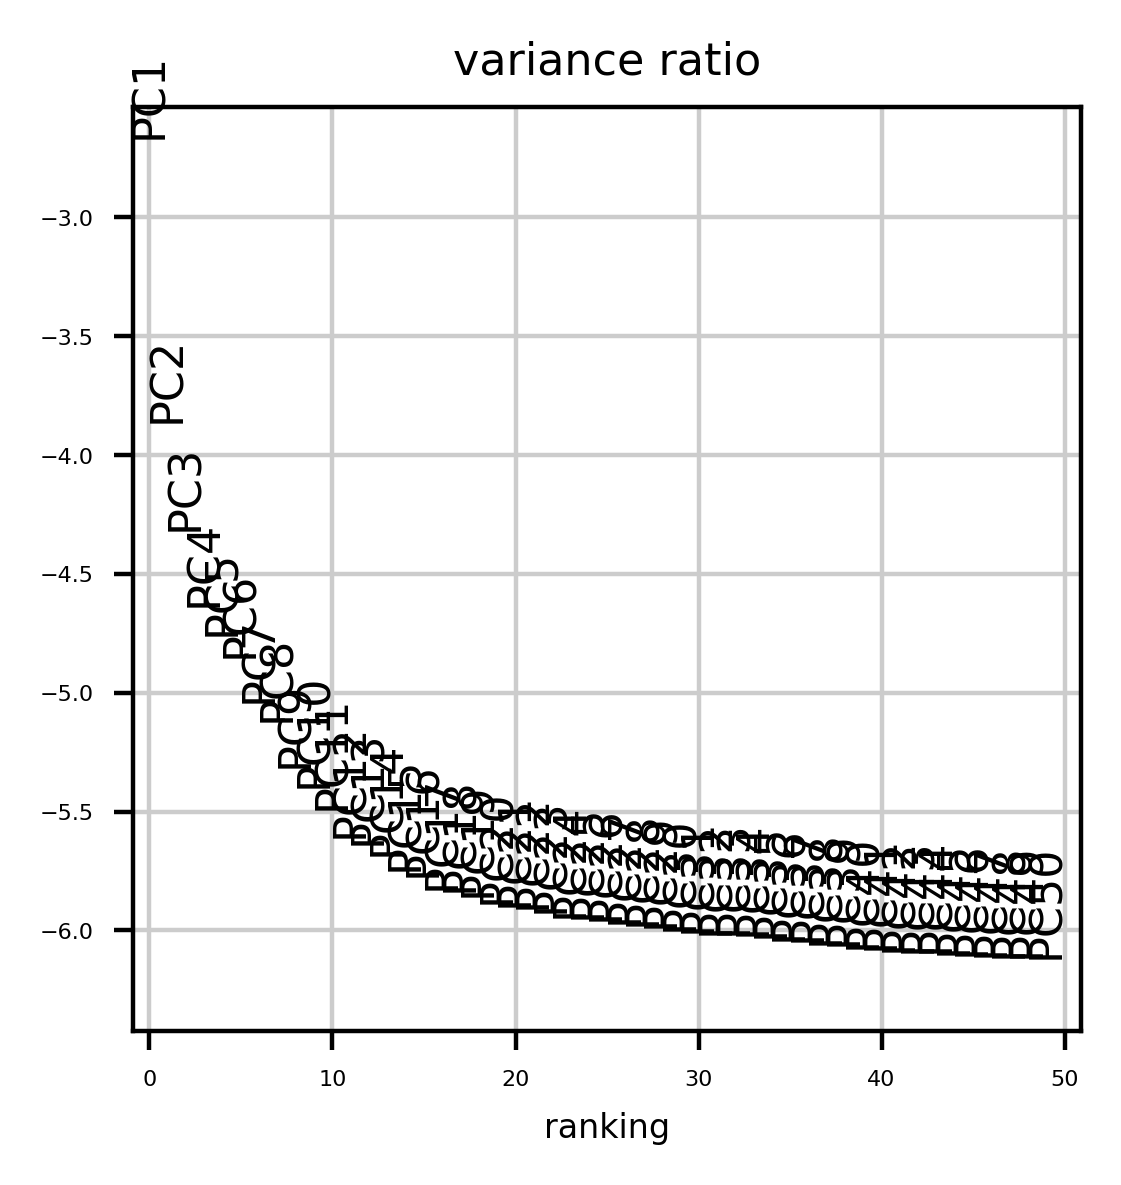

In [11]:
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (3, 3),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    sc.pl.pca_variance_ratio(adata,
                             n_pcs=50,
                             log=True)

### Compute Neighbours and draw a graph
---
Using ForceAtlas2

In [13]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.draw_graph(adata)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:17)


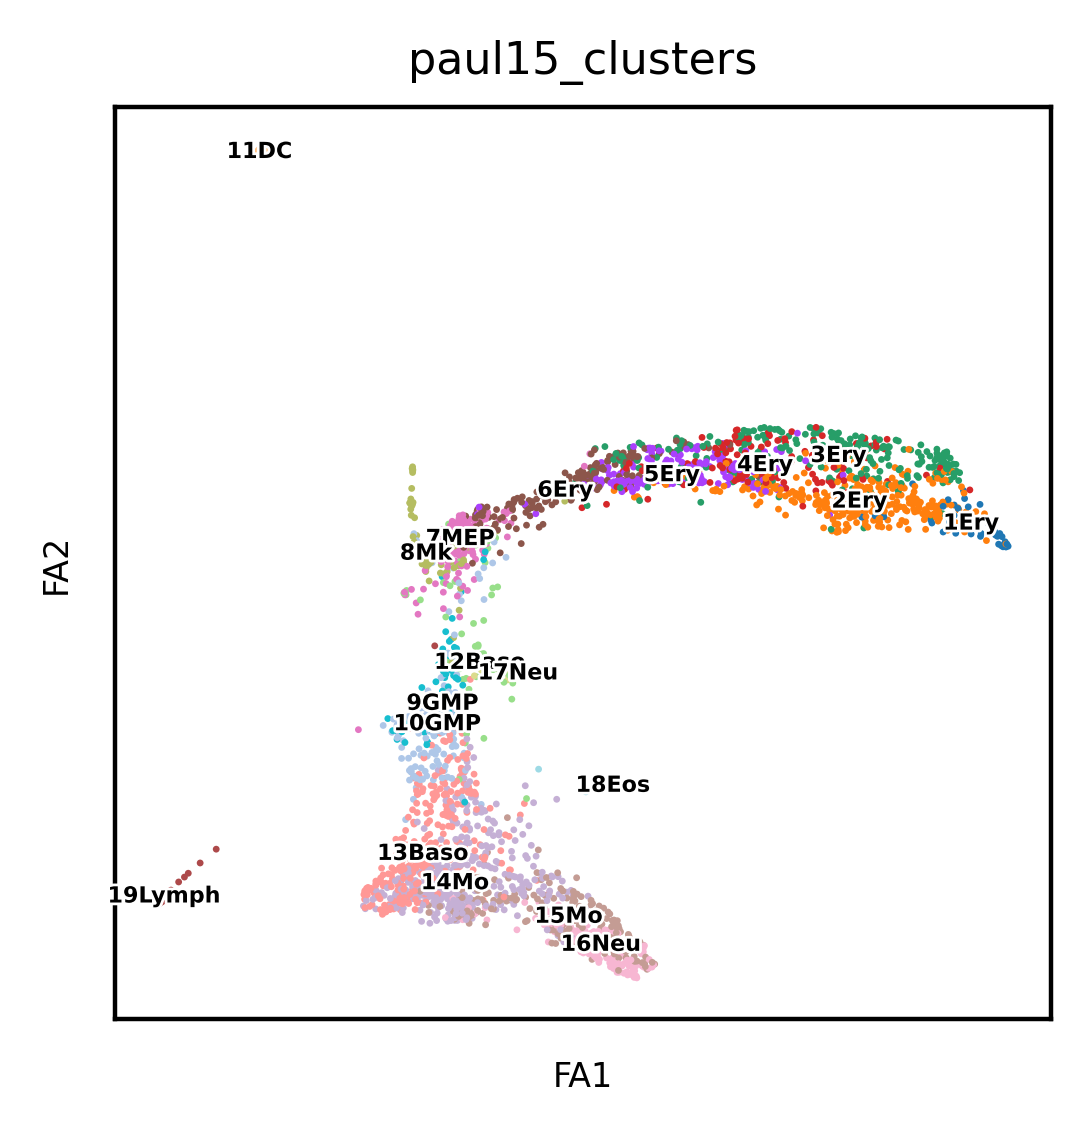

In [14]:
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (3, 3),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    sc.pl.draw_graph(adata,
                     color="paul15_clusters",
                     legend_loc="on data",
                     size=6,
                     legend_fontoutline=1,
                     legend_fontsize=4,
                     edges_width=0.1,
                     outline_width=0.5,
                     frameon=True
                    )

### De-noising the data
---

In [15]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep="X_diffmap")

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         1.         0.9989278  0.99671    0.99430376 0.98939794
     0.9883687  0.98731077 0.98398703 0.983007   0.9790806  0.9762548
     0.9744365  0.9729161  0.9652972 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


### Recompute Graph
---

In [16]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:16)


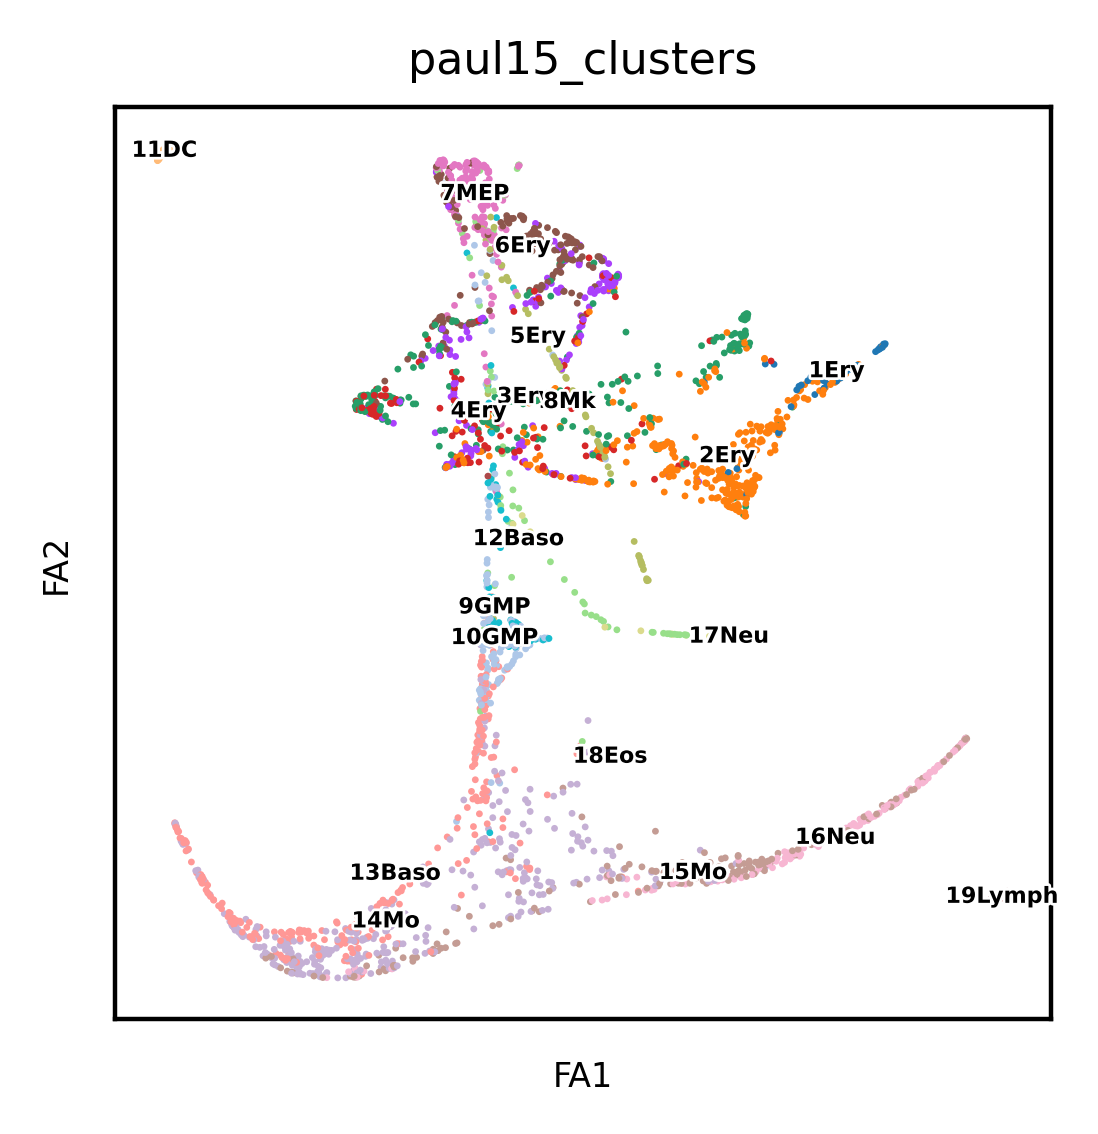

In [17]:
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (3, 3),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    sc.pl.draw_graph(adata,
                     color=["paul15_clusters"],
                     legend_loc="on data",
                     size=6,
                     legend_fontoutline=1,
                     legend_fontsize=4,
                     edges_width=0.1,
                     outline_width=0.5,
                     frameon=True,
                    )

### Clustering
---

In [18]:
sc.tl.louvain(adata, resolution=1.0)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 25 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


### Running PAGA
---

In [19]:
sc.tl.paga(adata, groups="louvain")

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


### Marker Gene based paga plots
---

--> added 'pos', the PAGA positions (adata.uns['paga'])


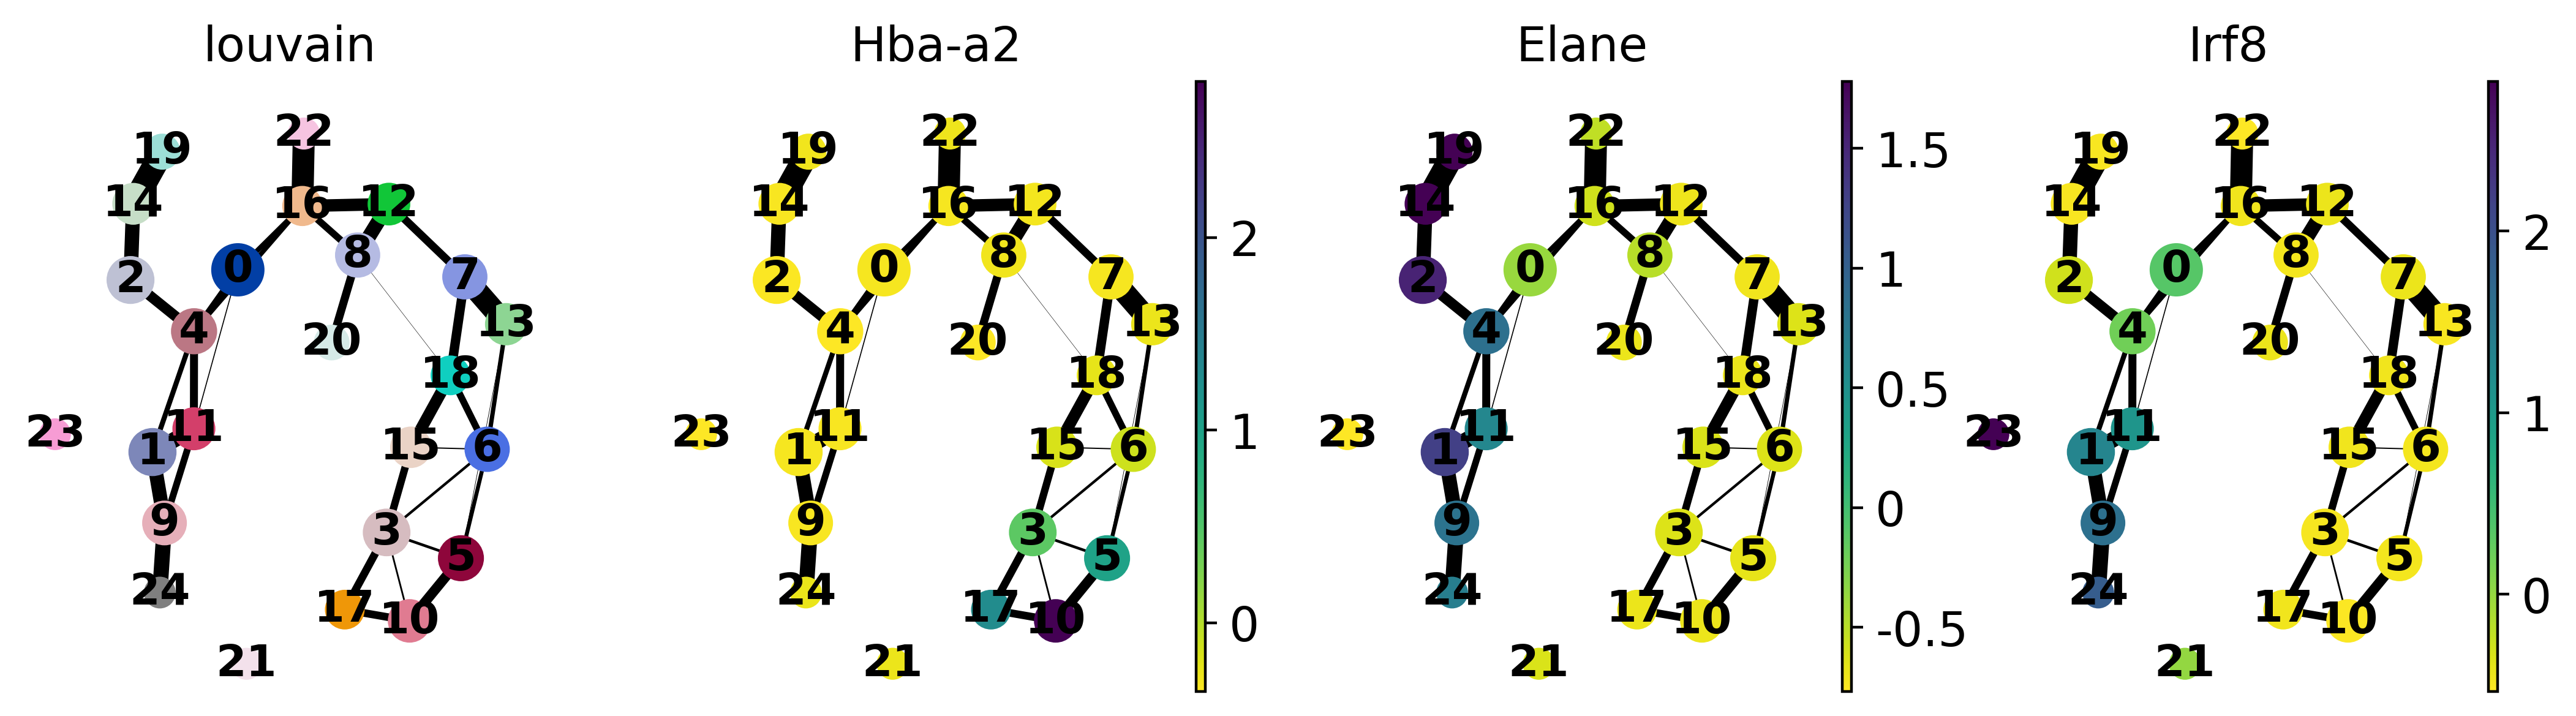

In [20]:
sc.pl.paga(adata, color=["louvain", "Hba-a2", "Elane", "Irf8"])

--> added 'pos', the PAGA positions (adata.uns['paga'])


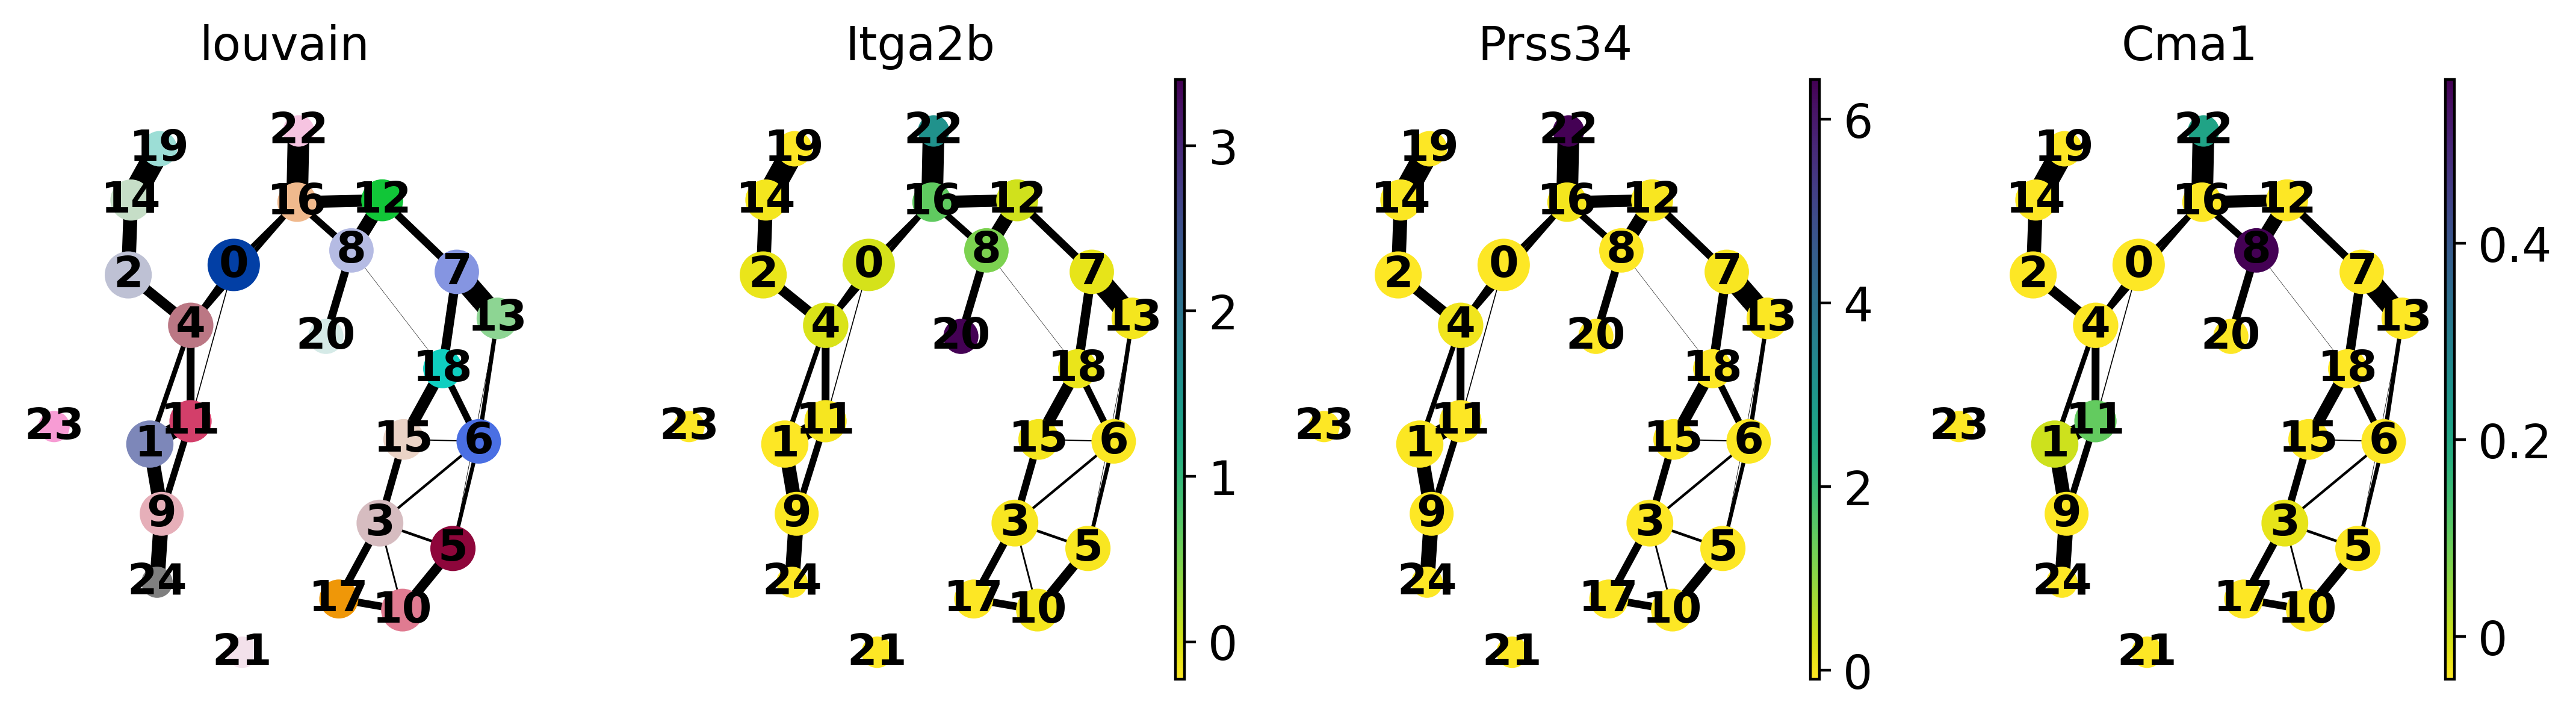

In [21]:
sc.pl.paga(adata, color=["louvain", "Itga2b", "Prss34", "Cma1"])

### Check Louvain Categories
---

In [22]:
adata.obs["louvain"].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],
      dtype='object')

In [23]:
adata.obs["louvain_anno"] = adata.obs["louvain"]

### Reasssign categories as per tutorial
---
Here there is another colums in obs table that is created to hold renamed annotations `louvain_anno`

In [23]:
adata.obs['louvain_anno'] = adata.obs['louvain']
adata.obs['louvain_anno'].cat.categories = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10/Ery', '11', '12',
       '13', '14', '15', '16/Stem', '17', '18', '19/Neu', '20/Mk', '21', '22/Baso', '23', '24/Mo']

In [24]:
adata.obs

paul15_clusters  n_counts_all louvain louvain_anno
0               7MEP         353.0       8            8
1               15Mo        2556.0       1            1
2               3Ery        4649.0      17           17
3               15Mo        4486.0       2            2
4               3Ery        5205.0      17           17
...              ...           ...     ...          ...
2725            2Ery        4873.0       6            6
2726          13Baso        3553.0      24        24/Mo
2727            7MEP         443.0       8            8
2728            15Mo        3252.0       2            2
2729            3Ery        6401.0       3            3

[2730 rows x 4 columns]

### Rerun PAGA

In [25]:
sc.tl.paga(adata, groups="louvain_anno")

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


### Plot the trajectories
---

--> added 'pos', the PAGA positions (adata.uns['paga'])


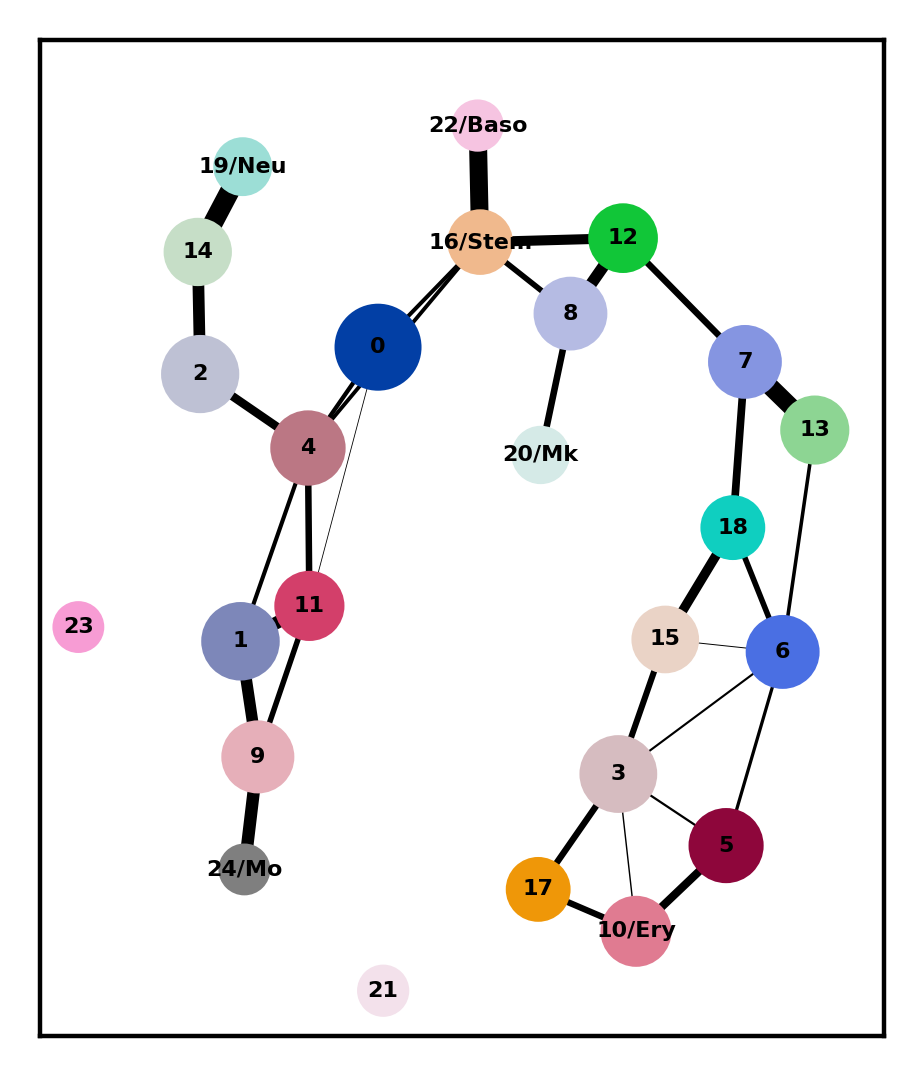

In [26]:
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (3, 3),
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    sc.pl.paga(adata,
               threshold=0.03,
               show=False,
               edge_width_scale=0.5,
               fontsize=4,
               frameon=True,
              )

In [27]:
adata

AnnData object with n_obs × n_vars = 2730 × 1000
    obs: 'paul15_clusters', 'n_counts_all', 'louvain', 'louvain_anno'
    var: 'n_counts', 'mean', 'std'
    uns: 'iroot', 'log1p', 'pca', 'neighbors', 'draw_graph', 'paul15_clusters_colors', 'diffmap_evals', 'louvain', 'paga', 'louvain_sizes', 'louvain_colors', 'louvain_anno_sizes', 'louvain_anno_colors'
    obsm: 'X_pca', 'X_draw_graph_fa', 'X_diffmap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

### Redraw the graph
---

In [28]:
sc.tl.draw_graph(adata, init_pos="paga")

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:15)


### Plot scatter graph wrt to marker genes
---

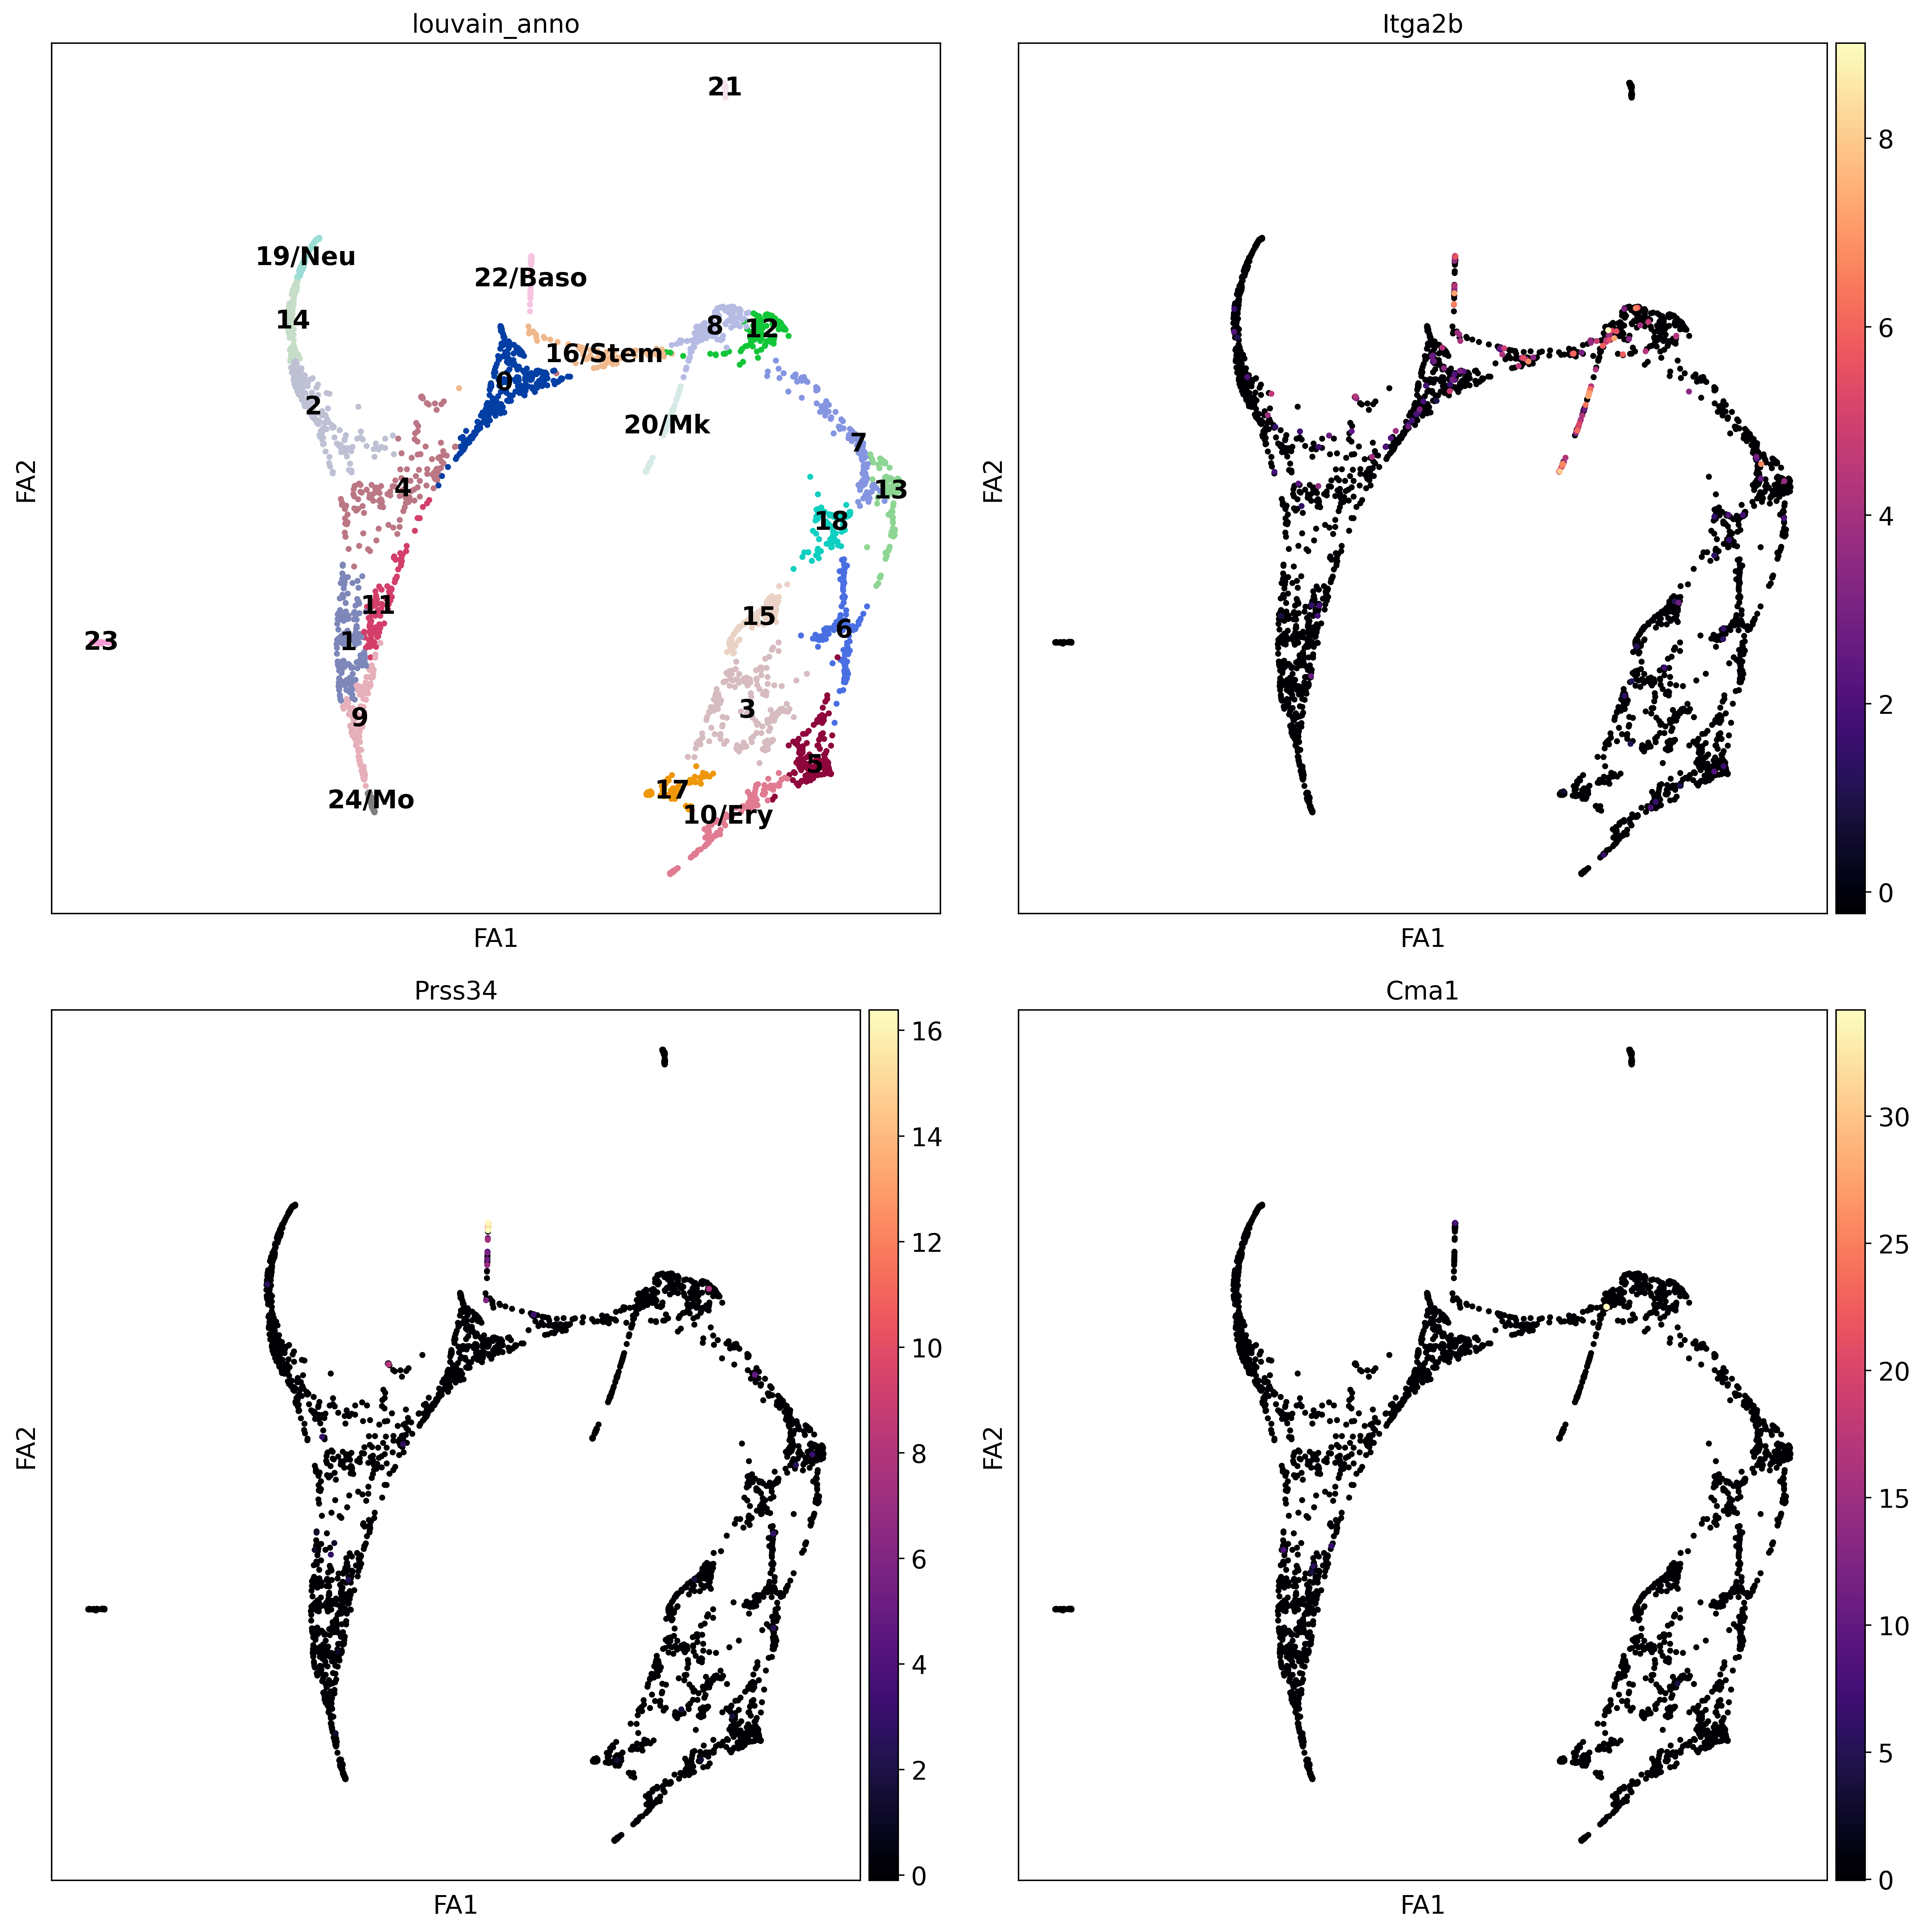

In [29]:
import matplotlib.pyplot as plt

# Create a figure with a specific size
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of features to plot
features = ["louvain_anno", "Itga2b", "Prss34", "Cma1"]

# Loop through the features and create a plot for each
for i, feature in enumerate(features):
    sc.pl.draw_graph(
        adata,
        color=feature,
        legend_loc="on data",
        ax=axes[i],  # Use the specific axis for each plot
        show=False,  # Don't show until all plots are created
        color_map="magma",
        frameon=True
    )

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the final arranged plots
plt.show()


### Recolor the graph based on annotations
---

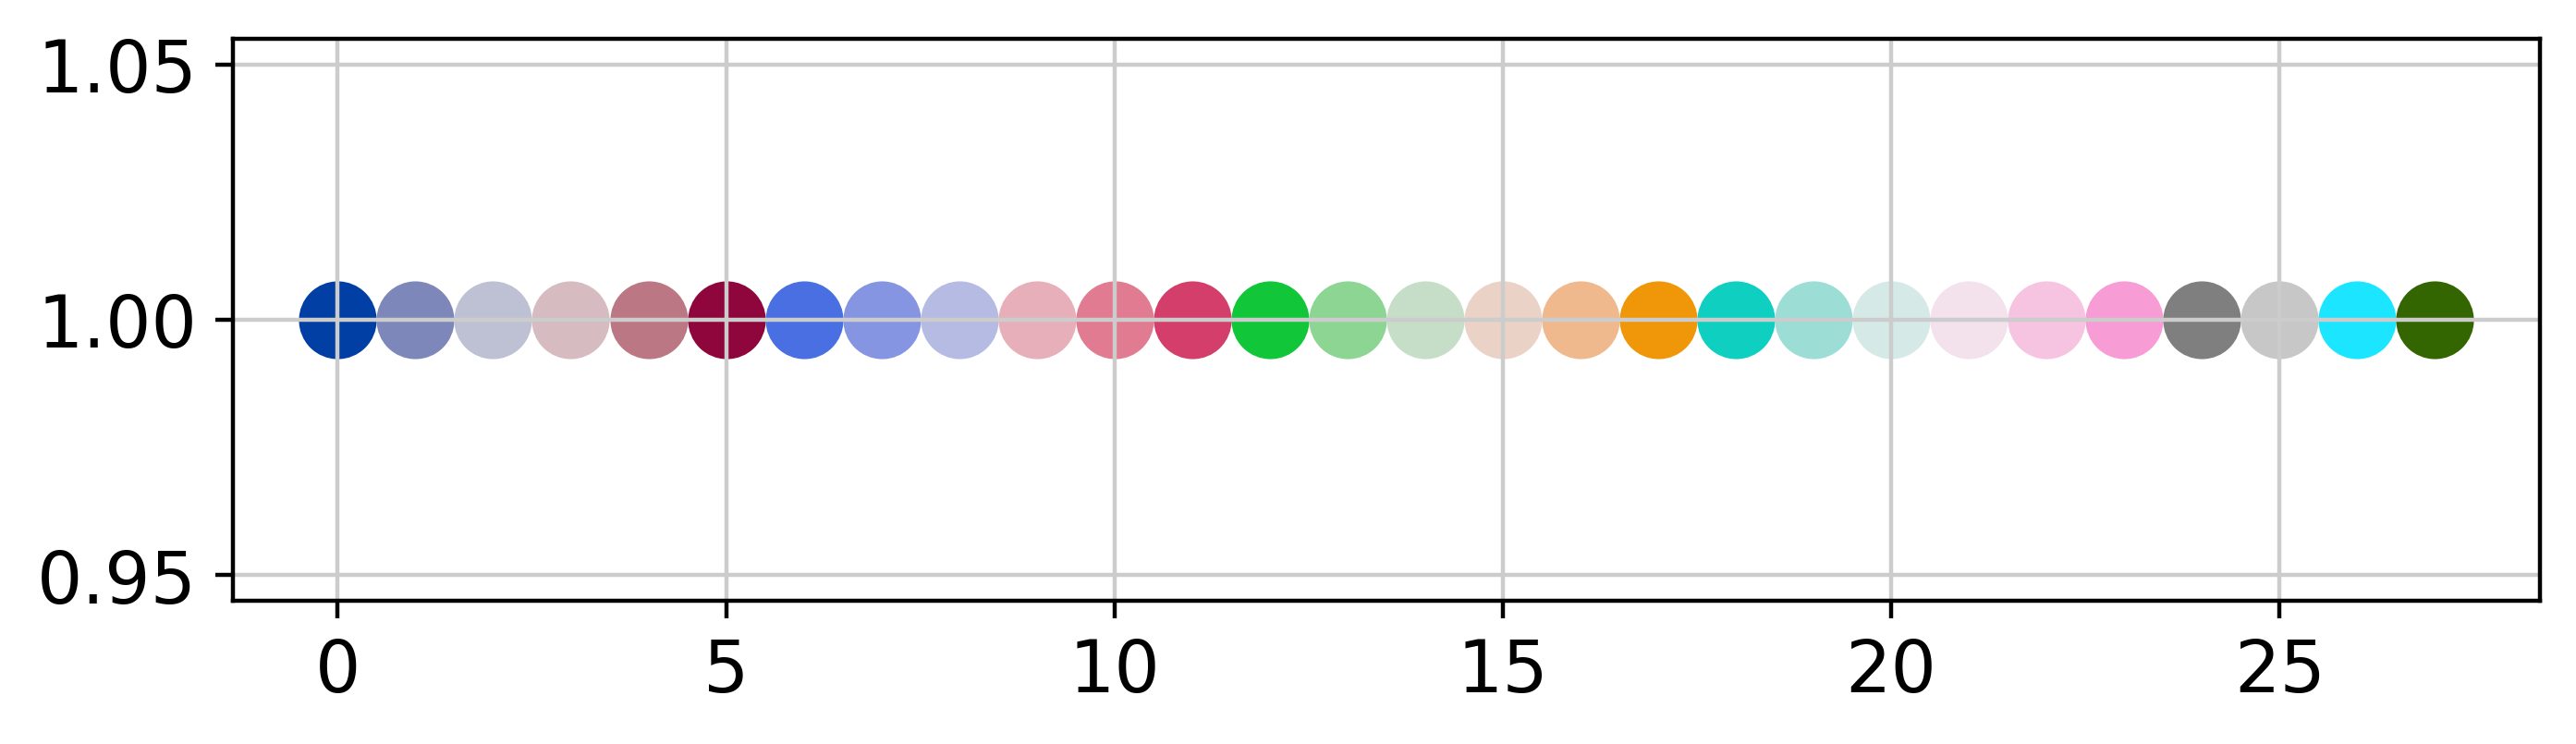

In [30]:
pl.figure(figsize=(8, 2))
for i in range(28):
    pl.scatter(i, 1, c=sc.pl.palettes.zeileis_28[i], s=200)
pl.show()

In [31]:
zeileis_colors = np.array(sc.pl.palettes.zeileis_28)
new_colors = np.array(adata.uns["louvain_anno_colors"])

In [32]:
new_colors[[16]] = zeileis_colors[[12]]  # Stem colors / green
new_colors[[10, 17, 5, 3, 15, 6, 18, 13, 7, 12]] = zeileis_colors[  # Ery colors / red
    [5, 5, 5, 5, 11, 11, 10, 9, 21, 21]
]
new_colors[[20, 8]] = zeileis_colors[[17, 16]]  # Mk early Ery colors / yellow
new_colors[[4, 0]] = zeileis_colors[[2, 8]]  # lymph progenitors / grey
new_colors[[22]] = zeileis_colors[[18]]  # Baso / turquoise
new_colors[[19, 14, 2]] = zeileis_colors[[6, 6, 6]]  # Neu / light blue
new_colors[[24, 9, 1, 11]] = zeileis_colors[[0, 0, 0, 0]]  # Mo / dark blue
new_colors[[21, 23]] = zeileis_colors[[25, 25]]  # outliers / grey

In [33]:
adata.uns["louvain_anno_colors"] = new_colors

--> added 'pos', the PAGA positions (adata.uns['paga'])


[<Axes:xlabel='FA1', ylabel='FA2'>, <Axes:>]

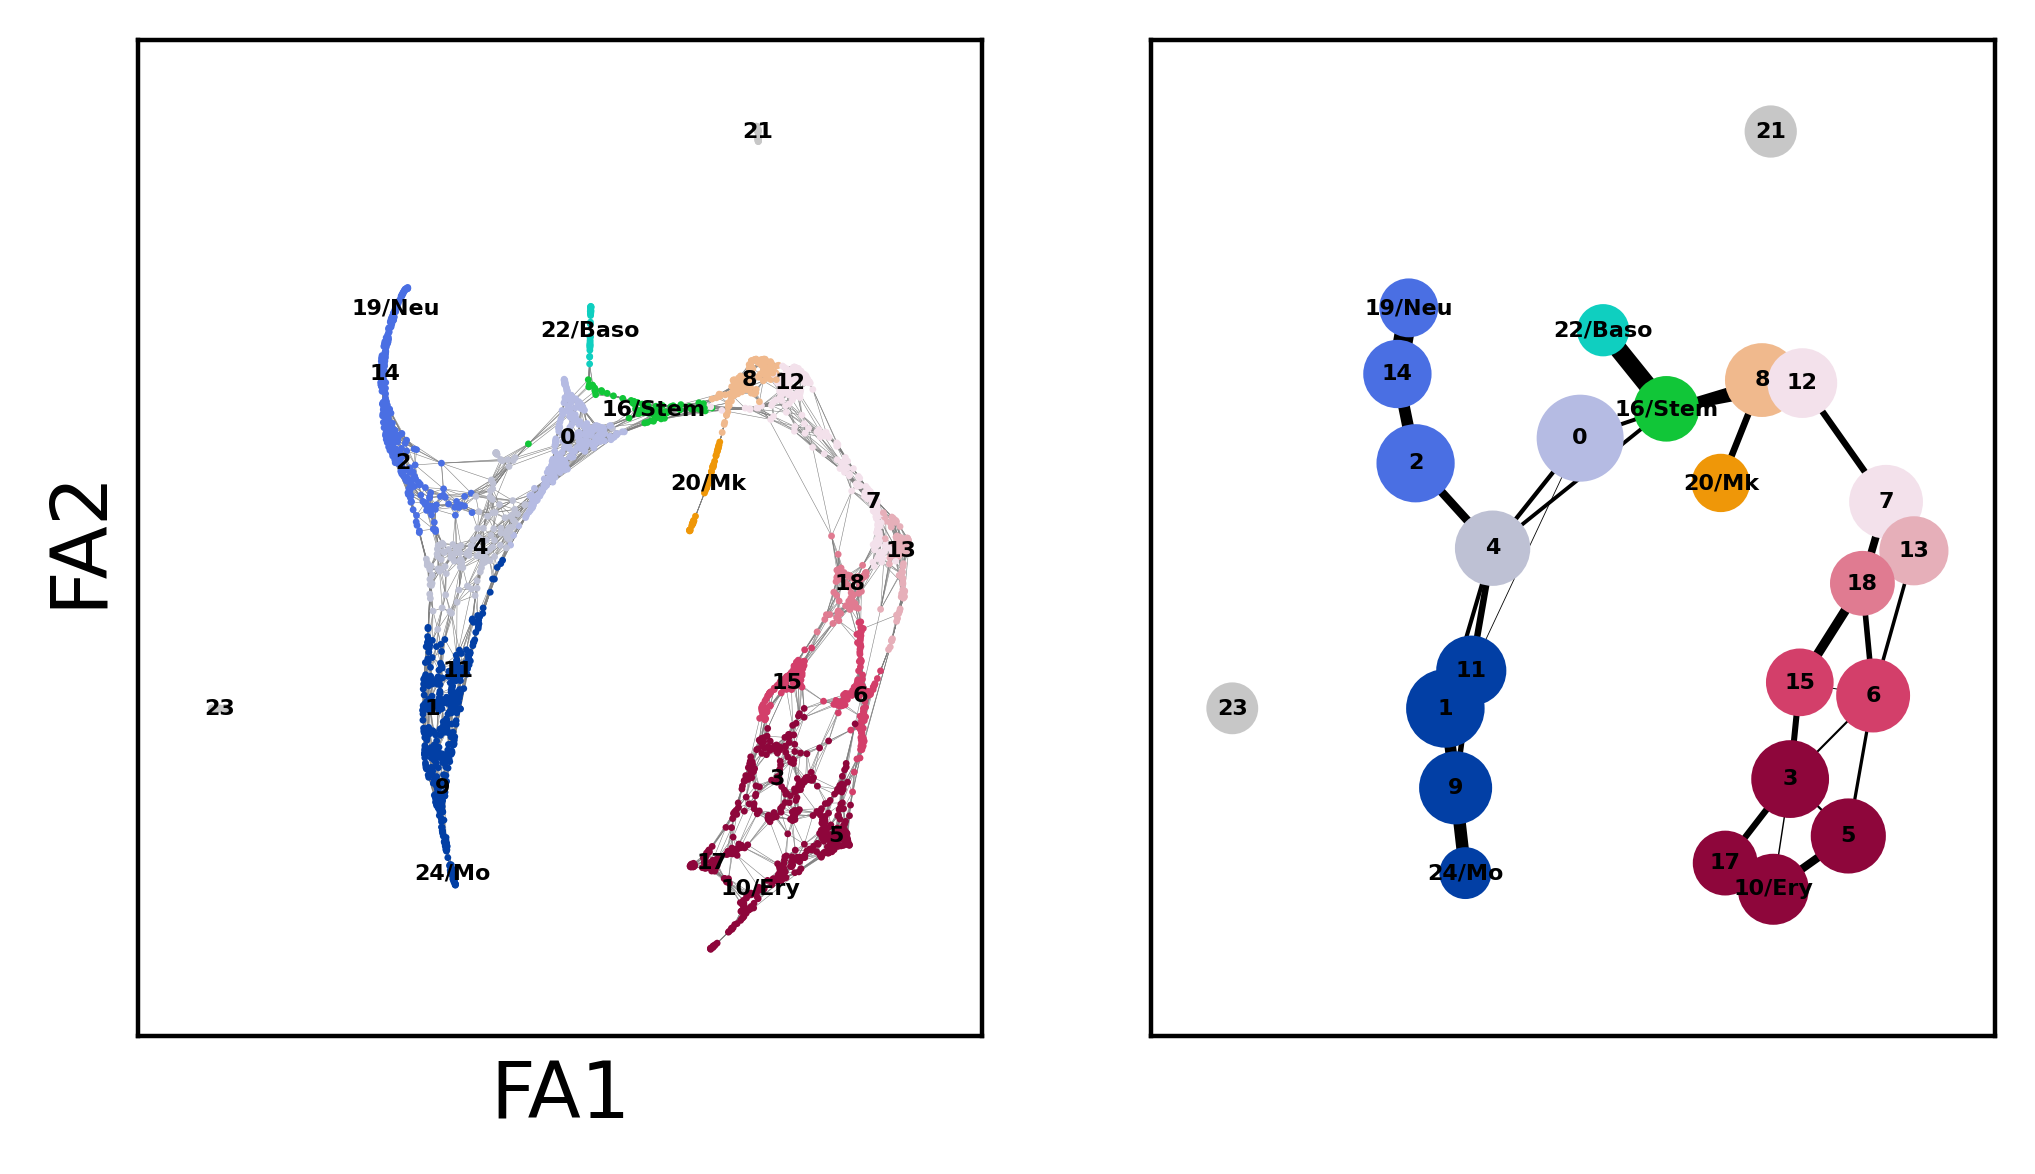

In [34]:
# Generate the plot without saving it
sc.pl.paga_compare(
    adata,
    threshold=0.03,
    title="",
    right_margin=0.2,
    size=6,
    edge_width_scale=0.5,
    legend_fontsize=4,
    fontsize=4,
    frameon=True,
    edges=True,
    save=False,  # Don't save immediately
    show=False
)

### Compute tSNE
---

In [35]:
sc.tl.tsne(adata=adata)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE


/usr/local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:18)


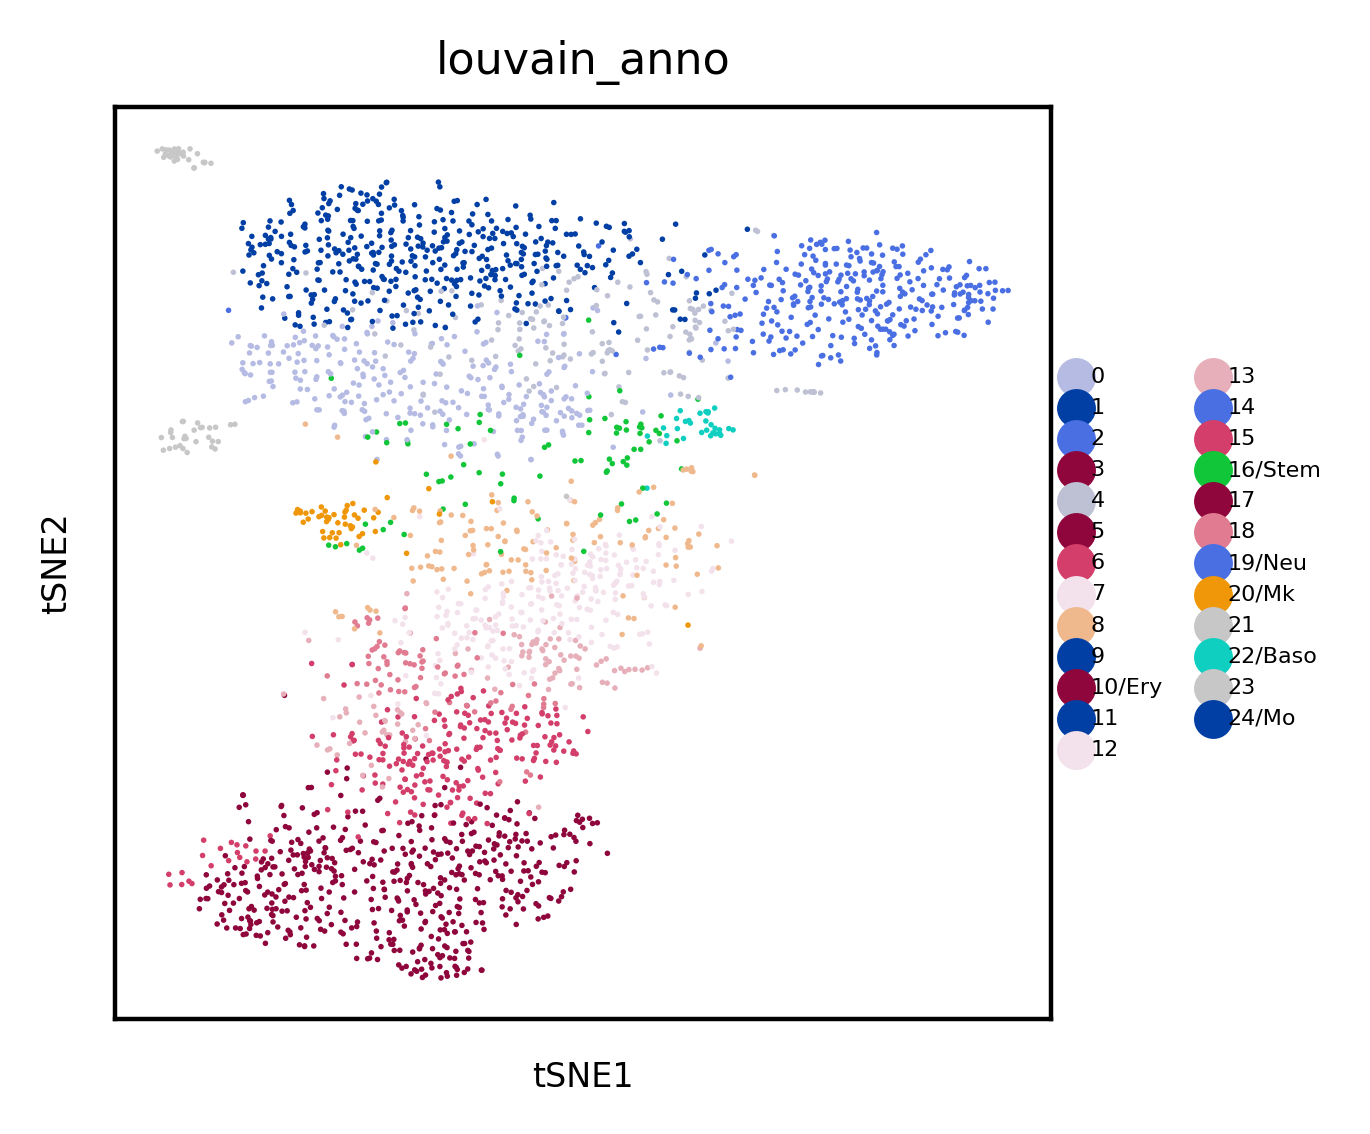

In [36]:
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (3, 3),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    sc.pl.tsne(
        adata=adata,
        color=["louvain_anno"],
        size=4,
        legend_fontsize=4,
        frameon=True
    )

### Applying original annotations
---

Here we try to annotate the clusters using the original `marker gene - cell` type set

In [37]:
cell_markers = {
    "Erythroids": ["Hba-a2"],
    "Neutrophils": ["Elane"],
    "Monocytes": ["Irf8"],
    "Megakaryocytes": ["Itga2b"],
    "Basophils": ["Prss34"],
    "Mast cells": ["Cma1"],
    "Mast cells & Basophils": [ "Cpa3"]
}

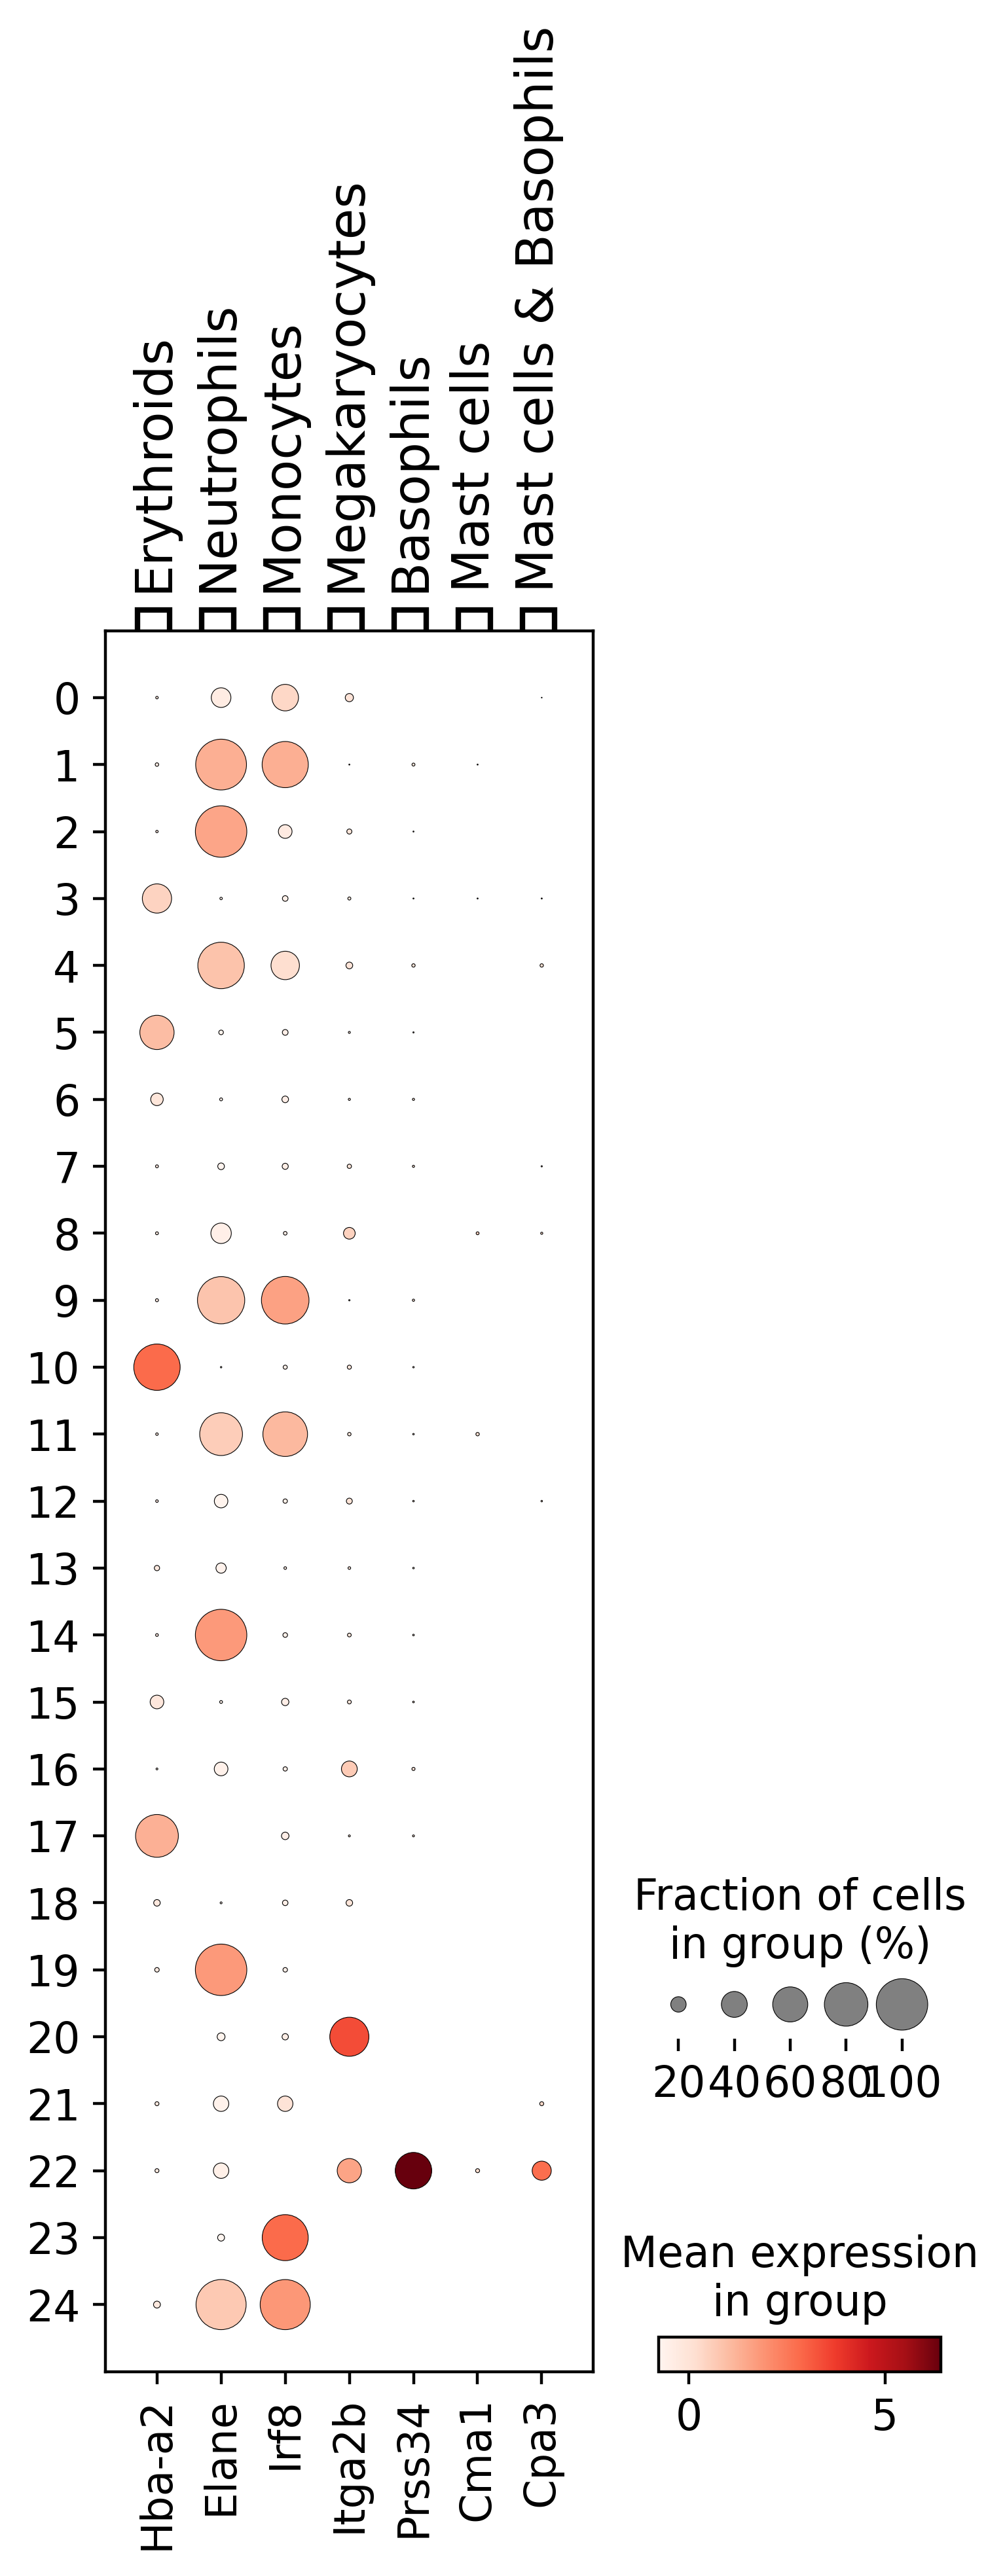

In [38]:
sc.pl.dotplot(adata,
              cell_markers,
              groupby="louvain",
             )

### Transfer the annotations

In [39]:
adata.obs["cell_type"] = adata.obs["louvain"].map(
    {
        '0': "HPC",
         '1': "Monocyte Progenitor",
         '2': "Neutrophils",
         '3': "Ery0",
         '4': "HPC",
         '5': "Ery0",
         '6': "Ery1",
         '7': "Ery4",
         '8': "Ery4",
         '9': "Monocyte Progenitor",
         '10': "Ery0",
         '11': "Monocyte Progenitor",
         '12': "Ery4",
         '13': "Ery3",
         '14': "Neutrophils",
         '15': "Ery1",
         '16': "Early Progenitor",
         '17': "Ery0",
         '18': "Ery2",
         '19': "Neutrophils",
         '20': "Mep",
         '21': "DC",
         '22': "Basophil",
         '23': "Lymph",
         '24': "Monocyte Progenitor"
}
)

In [40]:
adata

AnnData object with n_obs × n_vars = 2730 × 1000
    obs: 'paul15_clusters', 'n_counts_all', 'louvain', 'louvain_anno', 'cell_type'
    var: 'n_counts', 'mean', 'std'
    uns: 'iroot', 'log1p', 'pca', 'neighbors', 'draw_graph', 'paul15_clusters_colors', 'diffmap_evals', 'louvain', 'paga', 'louvain_sizes', 'louvain_colors', 'louvain_anno_sizes', 'louvain_anno_colors', 'tsne'
    obsm: 'X_pca', 'X_draw_graph_fa', 'X_diffmap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_type']`
categories: Basophil, DC, Early Progenitor, etc.
var_group_labels: Erythroids, Neutrophils, Monocytes, etc.


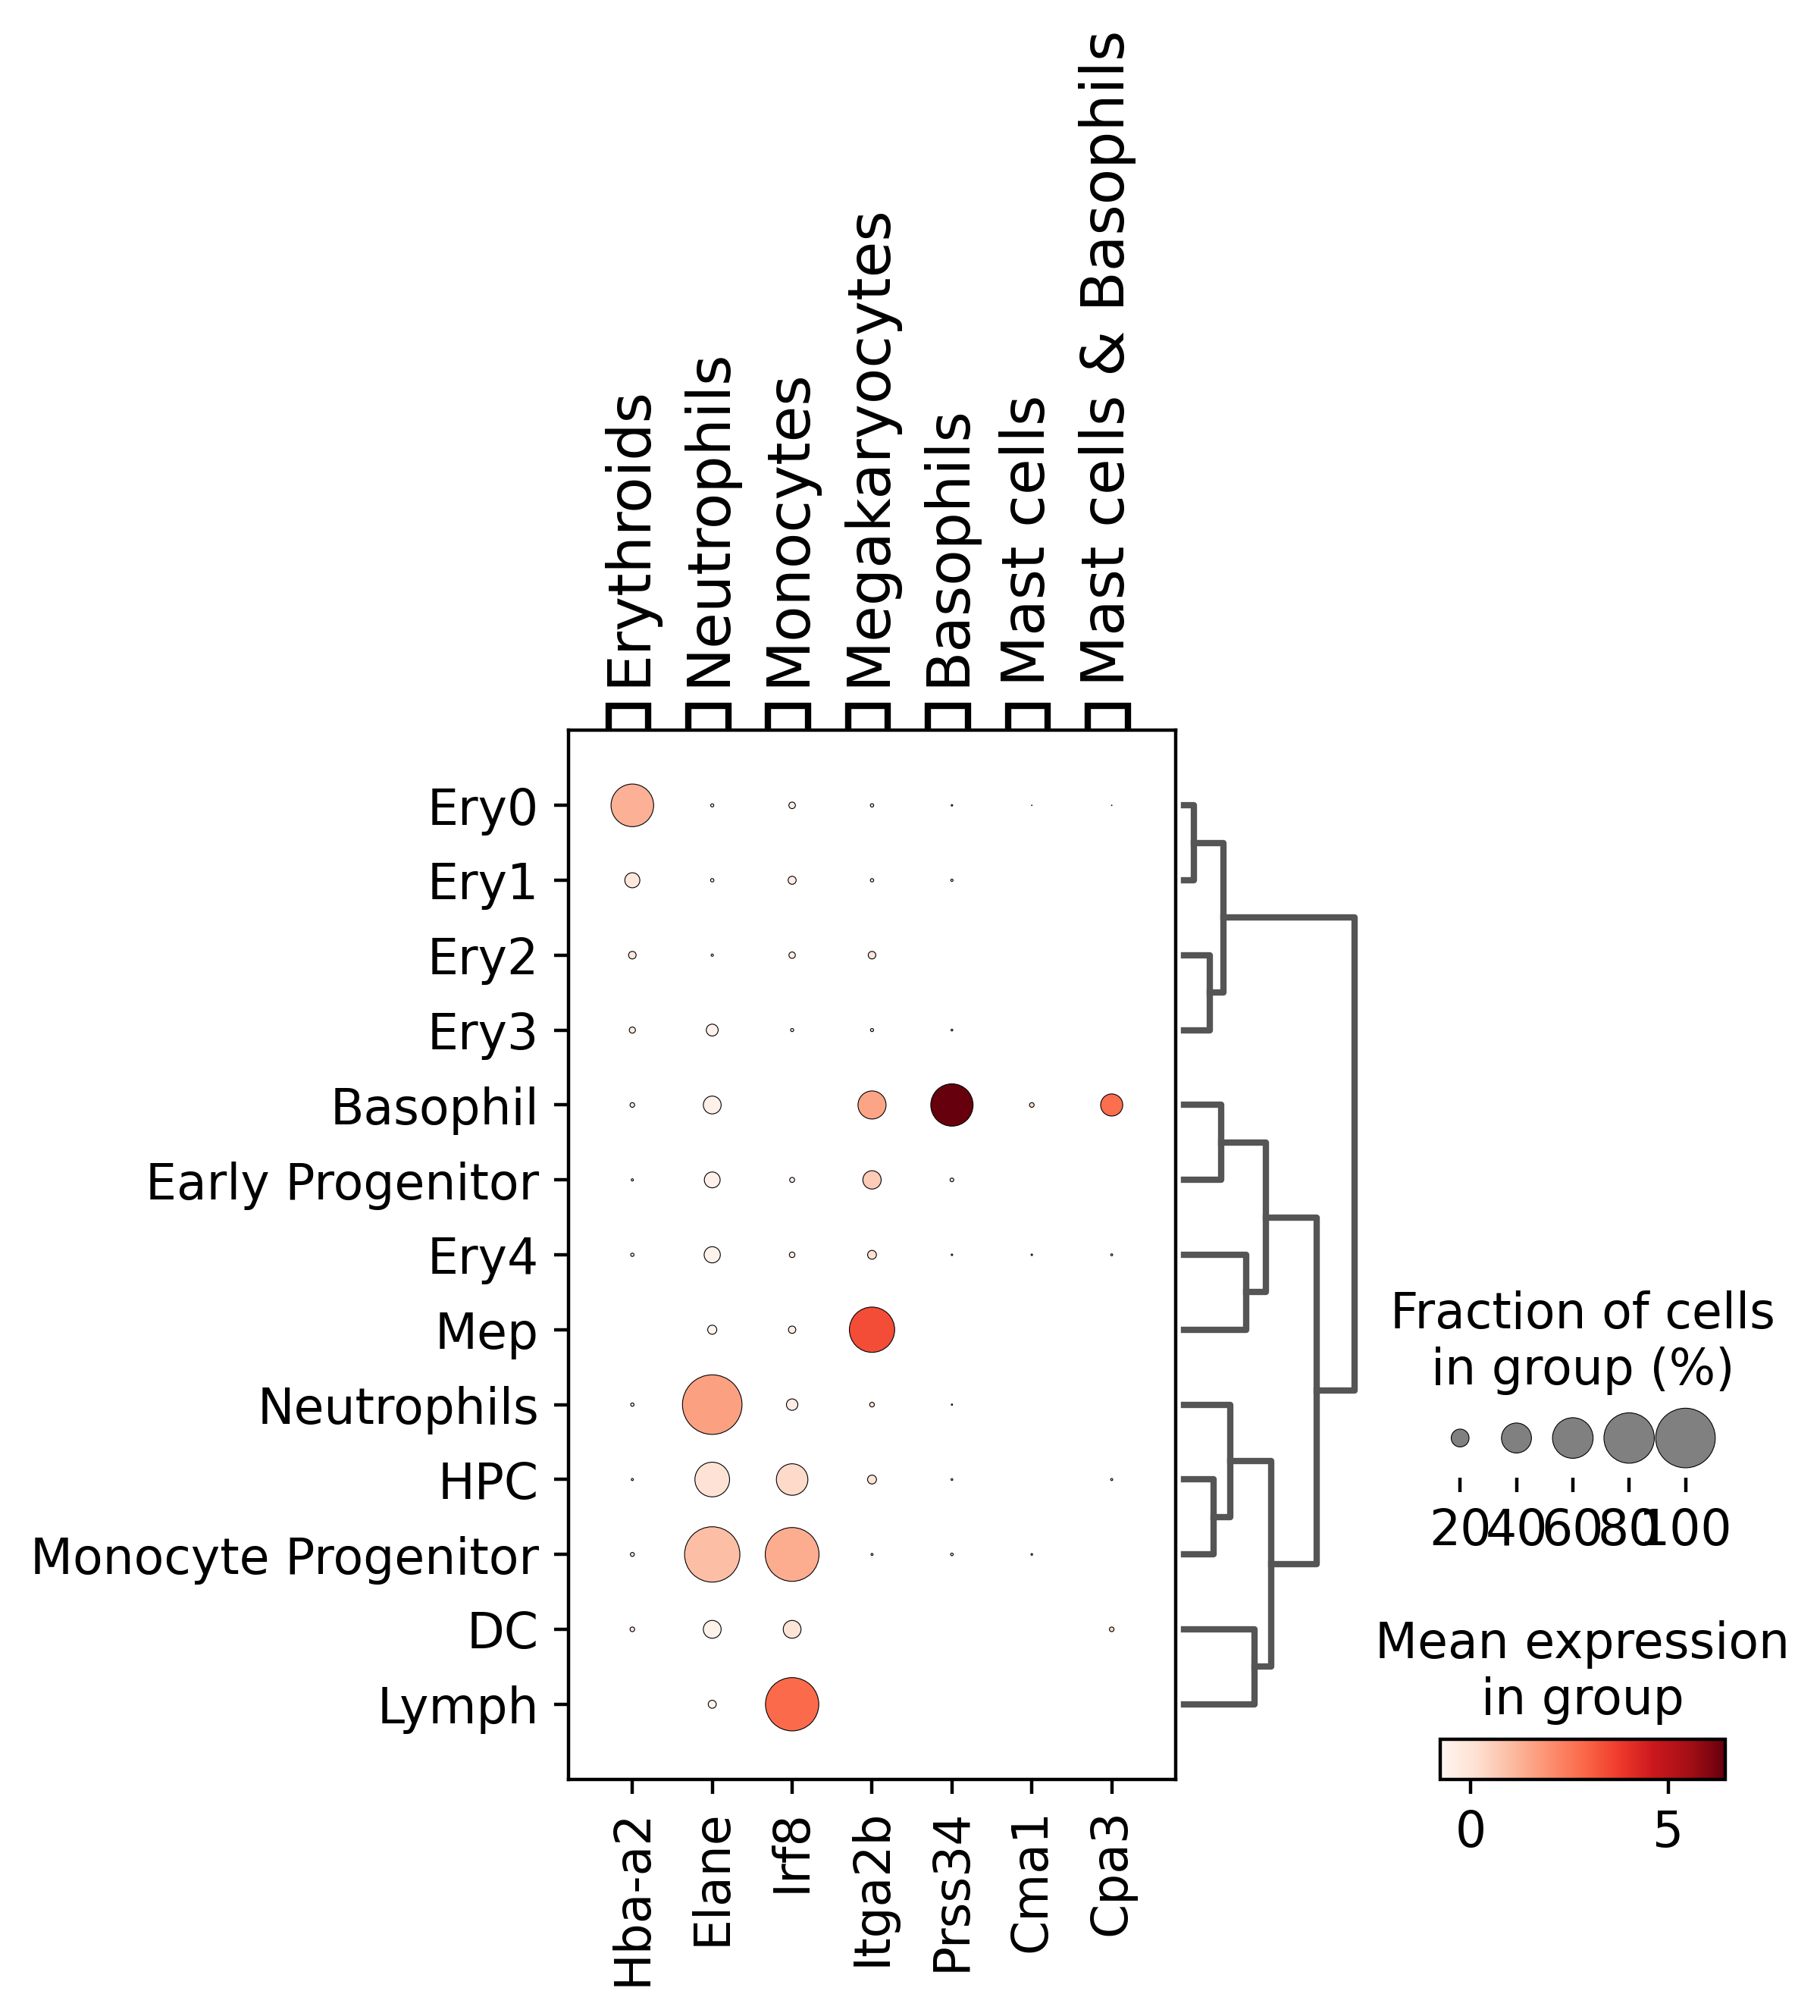

In [41]:
sc.pl.dotplot(adata,
              cell_markers,
              groupby="cell_type",
              dendrogram=True,
             )

### Plotting the graph with new annotations

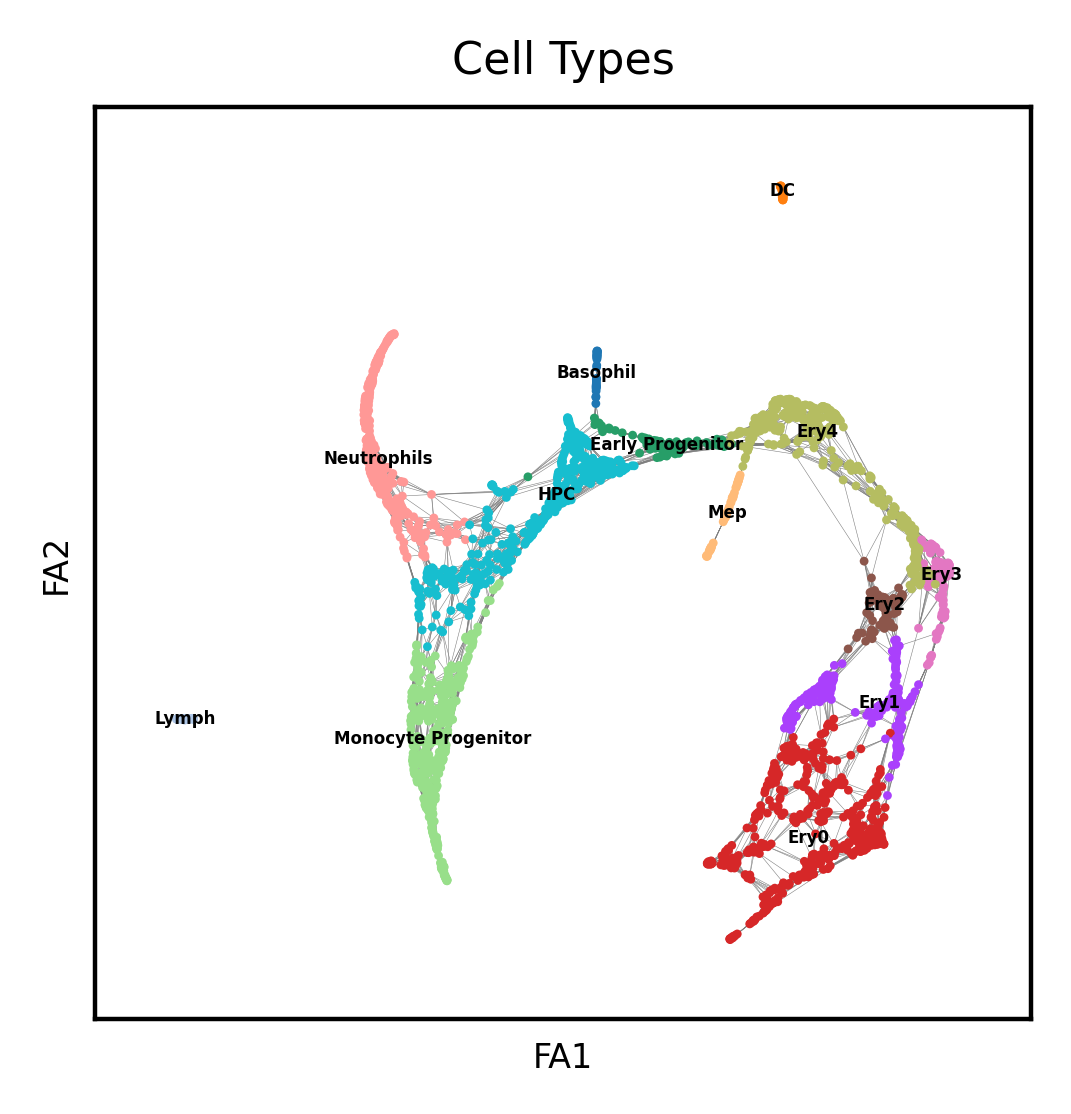

In [42]:
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (3, 3),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    sc.pl.draw_graph(
        adata, color=["cell_type"],
        legend_loc="on data",
        title="Cell Types",
        size=10,
        legend_fontsize=3,
        frameon=True,
        edges=True,
    )

### Pseudotime , (changes along the PAGA Paths)

Here me choose the `Early Progenitor` as our root cell

In [43]:
adata.uns["iroot"] = np.flatnonzero(adata.obs["cell_type"] == "Early Progenitor")[0]

In [44]:
sc.tl.dpt(adata)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


In [45]:
adata_raw = sc.datasets.paul15()
sc.pp.log1p(adata_raw)
sc.pp.scale(adata_raw)
adata.raw = adata_raw

/usr/local/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


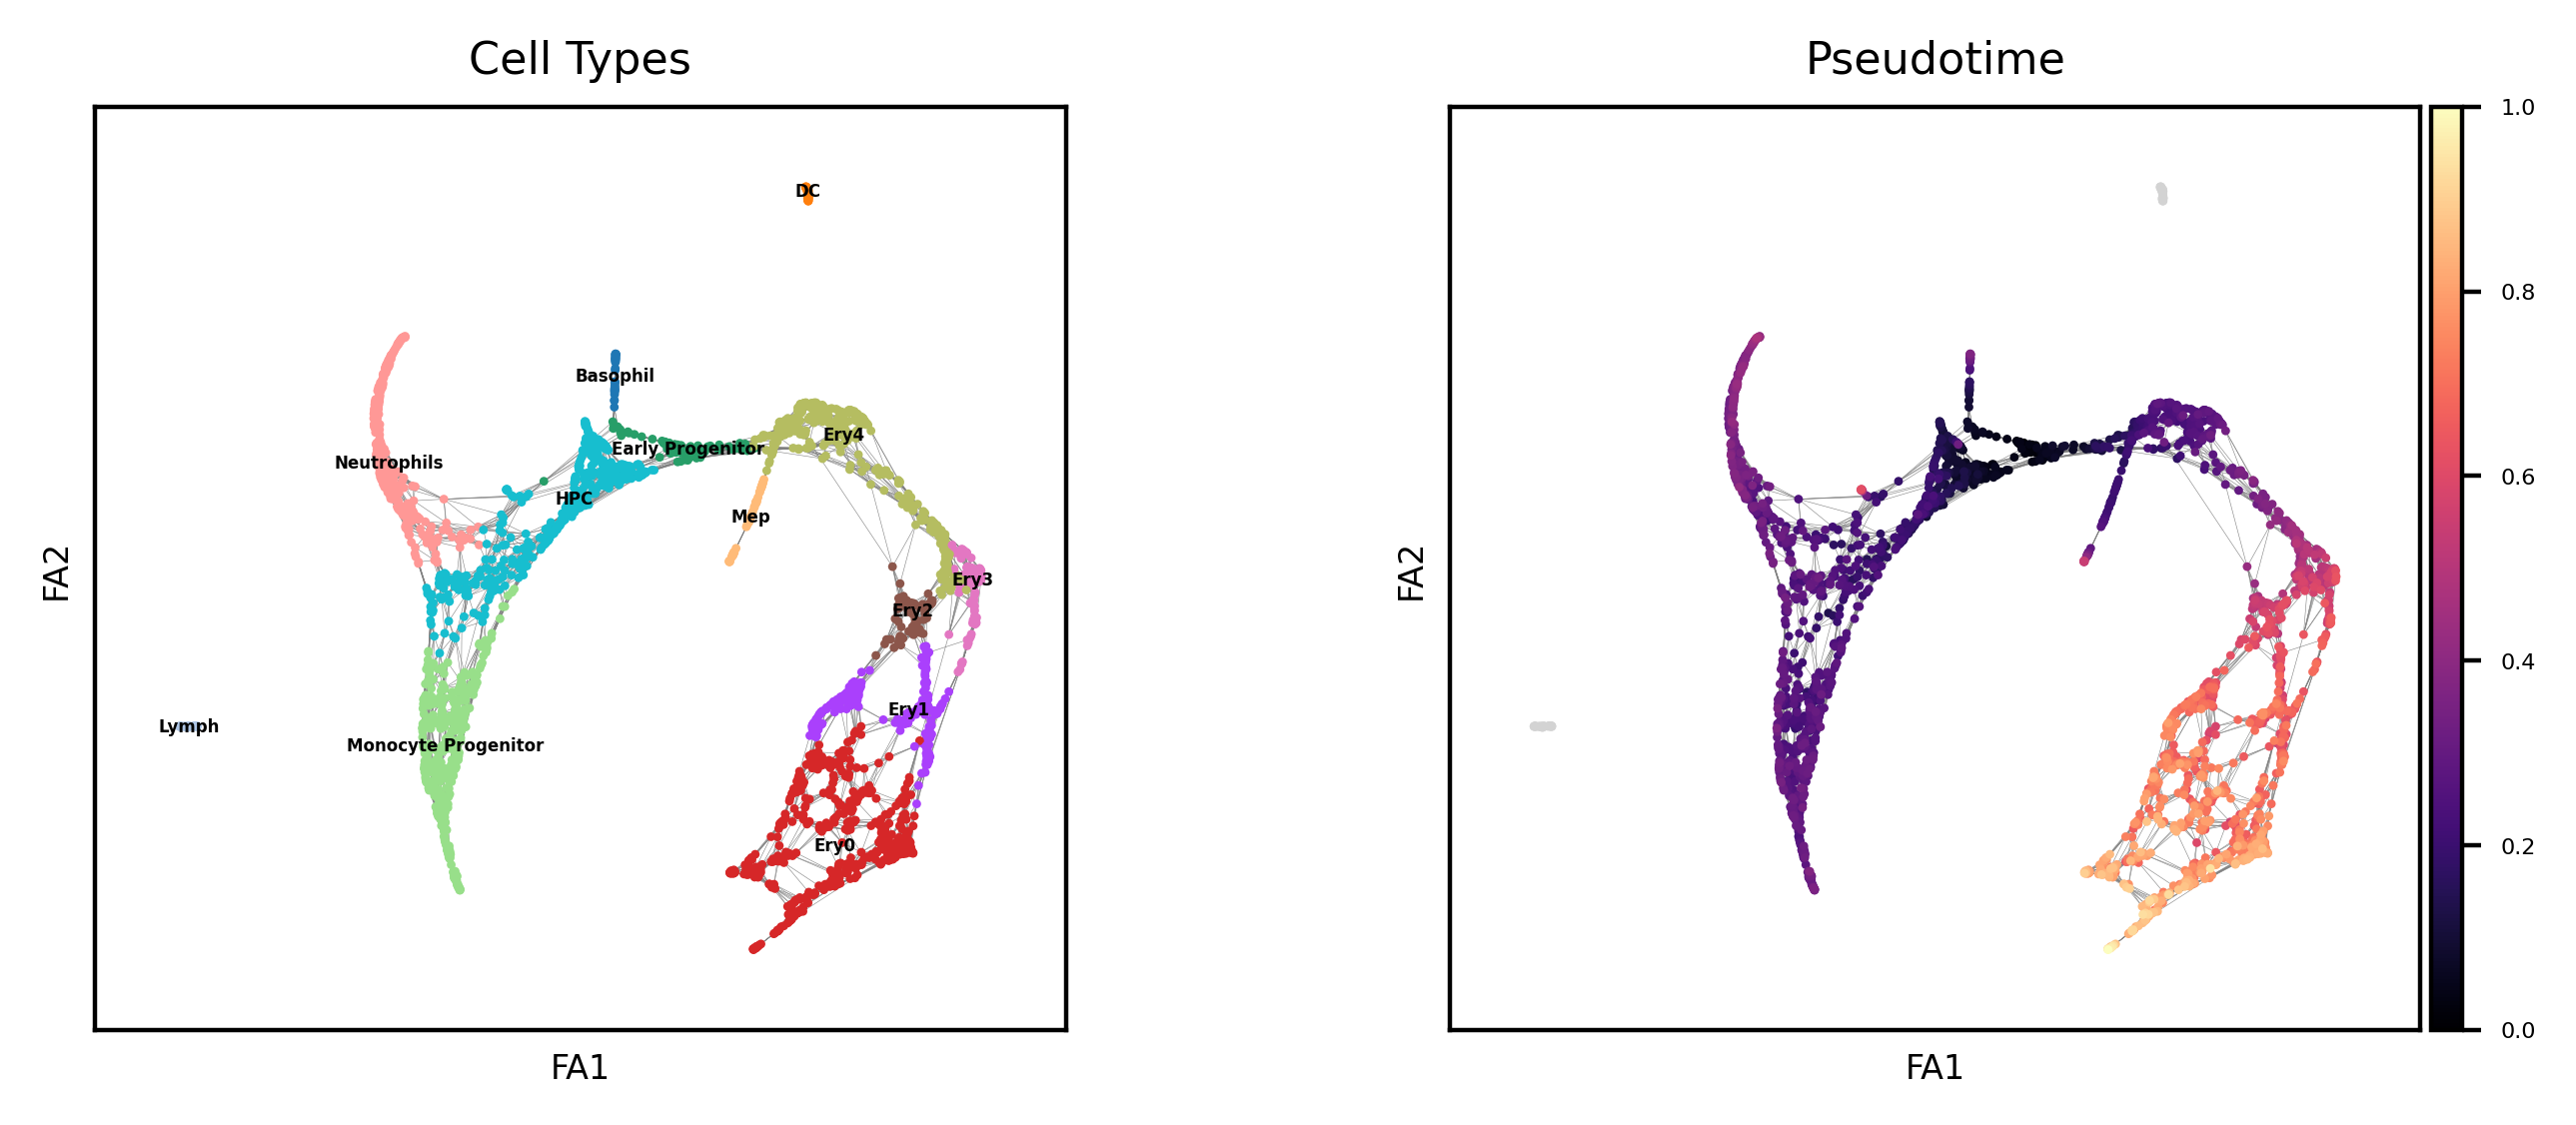

In [46]:
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (3, 3),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    sc.pl.draw_graph(
        adata,
        color=["cell_type", "dpt_pseudotime"],
        legend_loc="on data",
        title=["Cell Types","Pseudotime"],
        size=10,
        legend_fontsize=3,
        frameon=True,
        edges=True,
        color_map="magma"
    )

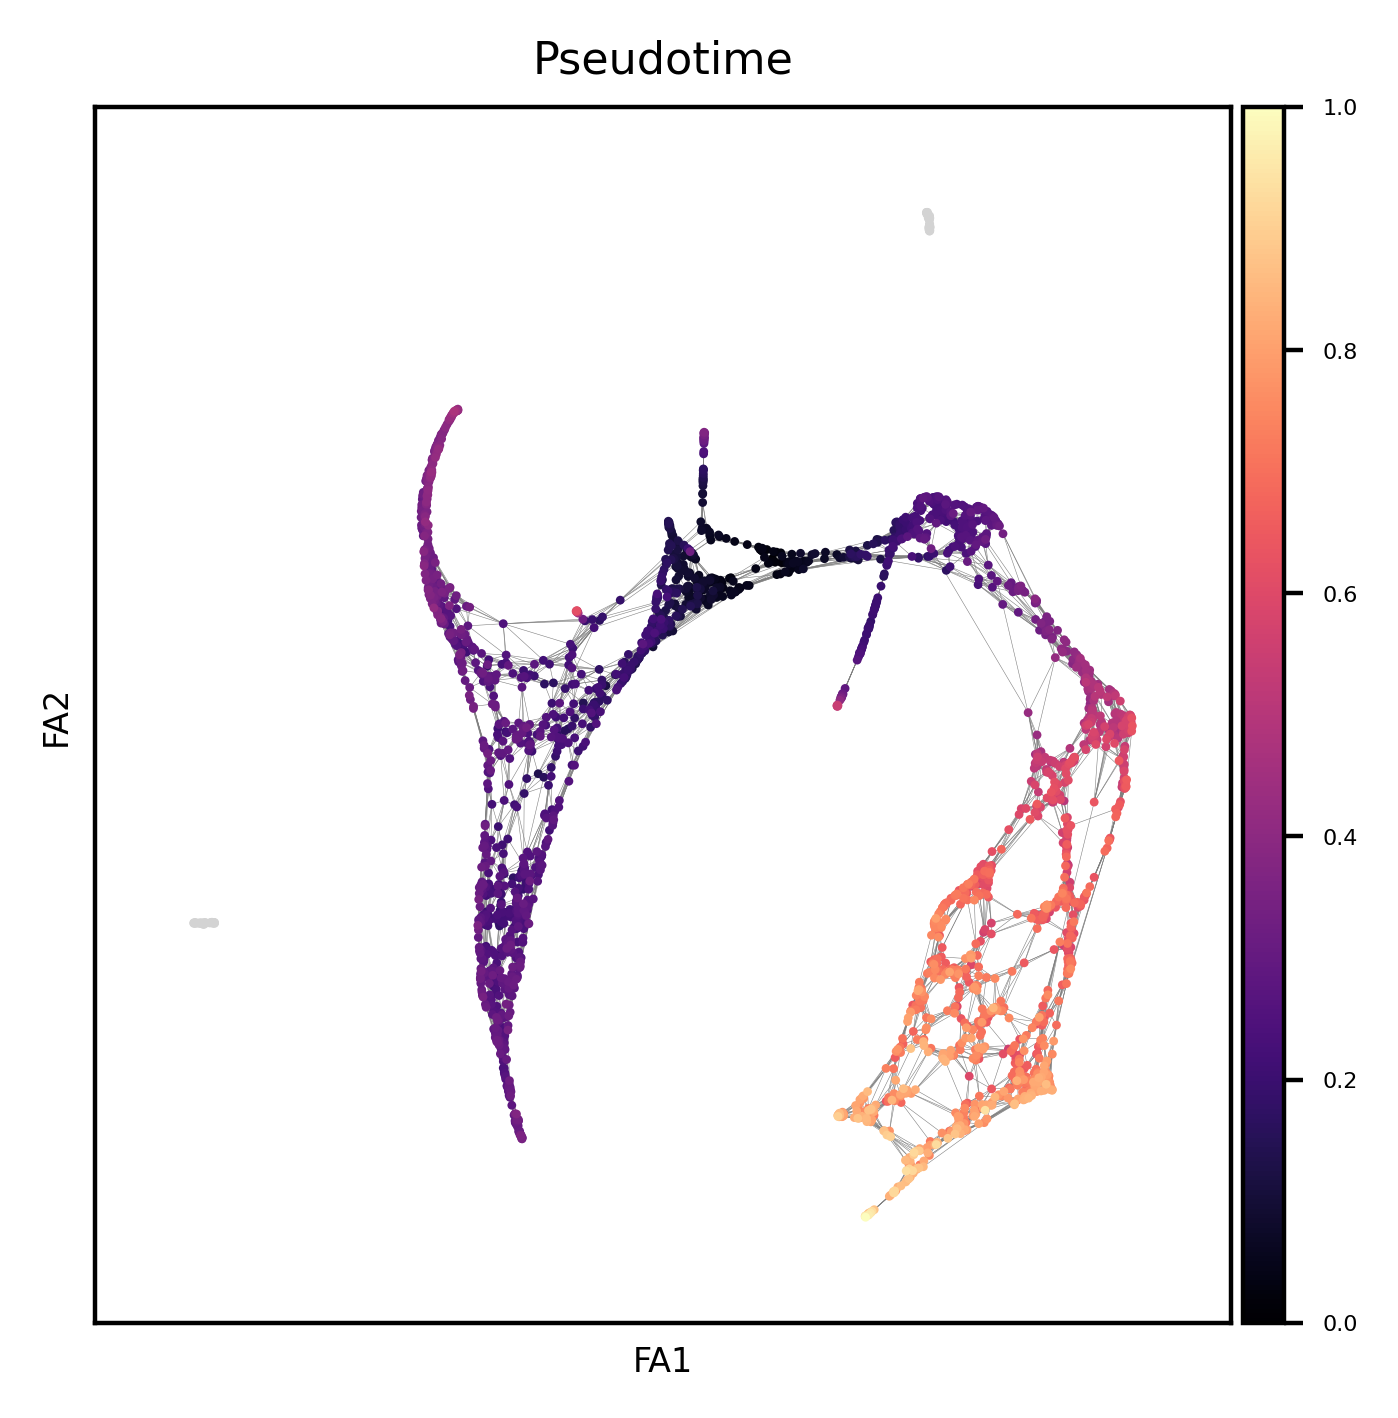

In [47]:
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (4, 4),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    sc.pl.draw_graph(
        adata,
        color="dpt_pseudotime",
        legend_loc="on data",
        title="Pseudotime",
        size=10,
        legend_fontsize=3,
        frameon=True,
        edges=True,
        color_map="magma",
        colorbar_loc="right"
    )

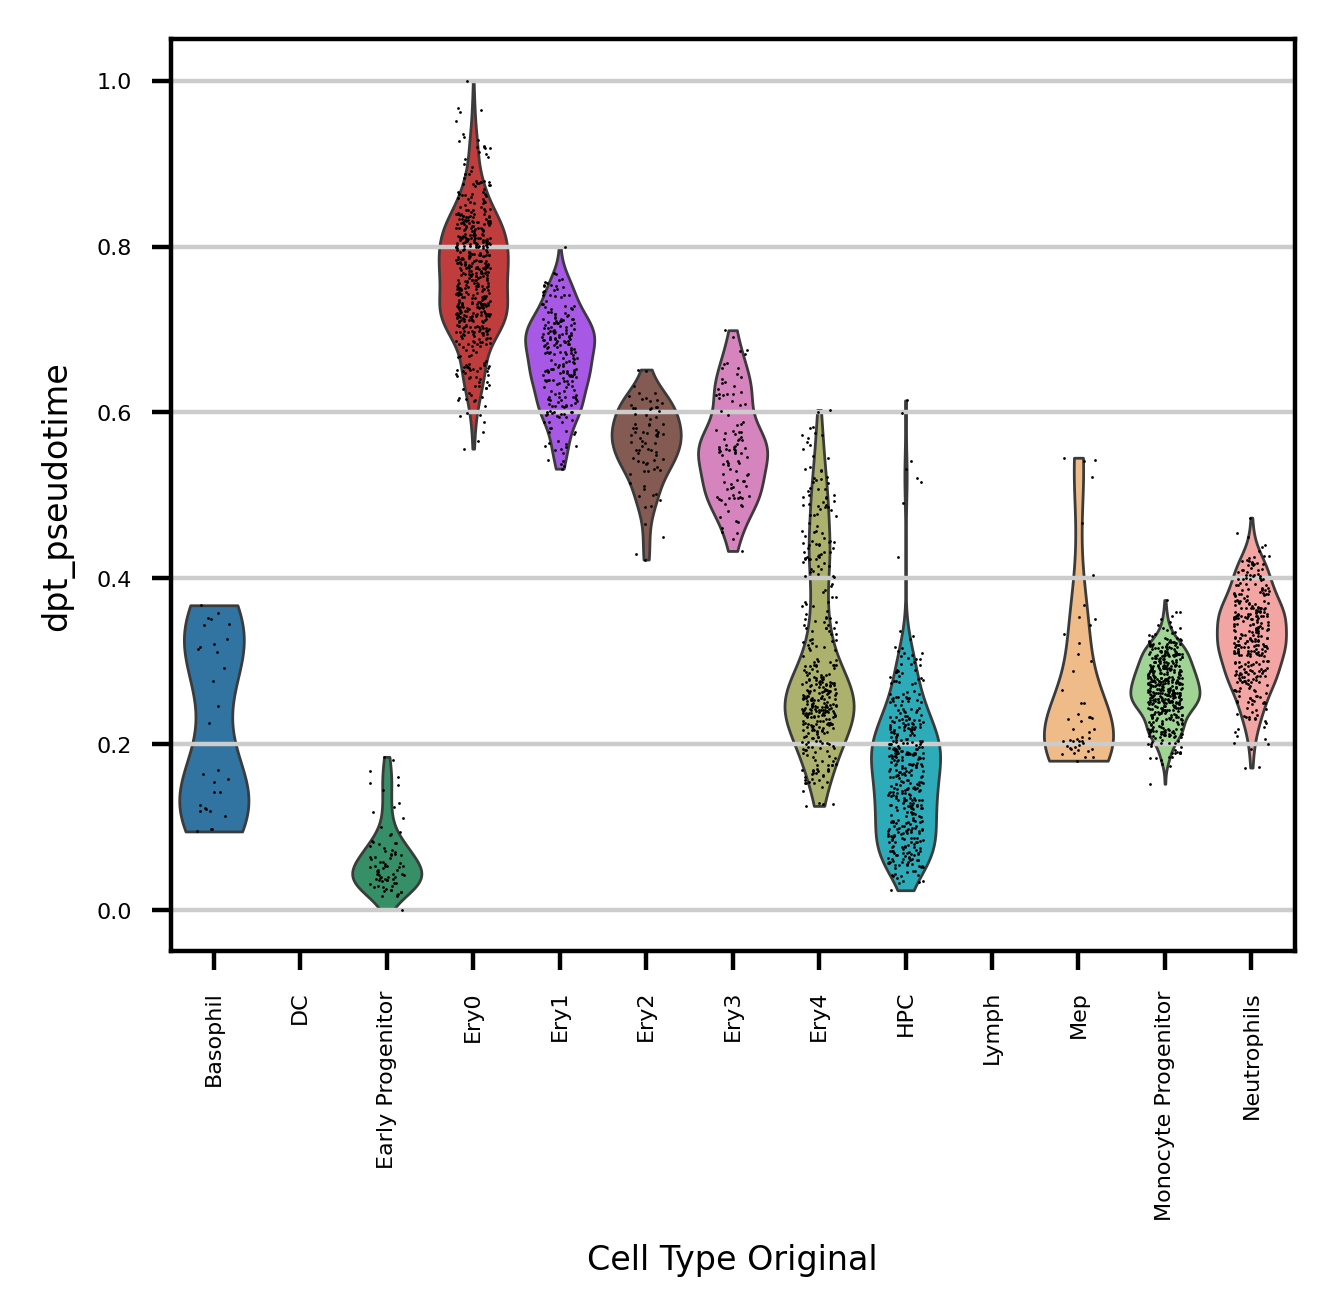

In [48]:
from matplotlib import rc_context
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (4, 3),
    "xtick.labelsize": 4,
    "ytick.labelsize": 4,
    "axes.labelsize": 6,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    sc.pl.violin(adata,
                 ["dpt_pseudotime"],
                 groupby="cell_type",
                 rotation=90.0,
                 linewidth=0.5,
                 jitter=0.2,
                 size=0.5,
                 xlabel="Cell Type Original",
                )

### Save the coordinates:
---

In [58]:
import pandas as pd

In [56]:
adata.write_h5ad("./output/adata_v2.h5ad")

Metadata

In [55]:
adata.obs

paul15_clusters  n_counts_all louvain louvain_anno            cell_type  \
0               7MEP         353.0       8            8                 Ery4   
1               15Mo        2556.0       1            1  Monocyte Progenitor   
2               3Ery        4649.0      17           17                 Ery0   
3               15Mo        4486.0       2            2          Neutrophils   
4               3Ery        5205.0      17           17                 Ery0   
...              ...           ...     ...          ...                  ...   
2725            2Ery        4873.0       6            6                 Ery1   
2726          13Baso        3553.0      24        24/Mo  Monocyte Progenitor   
2727            7MEP         443.0       8            8                 Ery4   
2728            15Mo        3252.0       2            2          Neutrophils   
2729            3Ery        6401.0       3            3                 Ery0   

      dpt_pseudotime  
0           0.225547  
1           0.273524  
2           0.710179  
3           0.267904  
4           0.781939  
...              ...  
2725        0.649140  
2726        0.298521  
2727        0.196117  
2728        0.264164  
2729        0.762039  

[2730 rows x 6 columns]

In [57]:
metadata = adata.obs

In [60]:
metadata.to_csv("output/metadata.csv")

ForceAtlas2 Coordinates

In [68]:
FA2_coordinates = pd.DataFrame(adata.obsm["X_draw_graph_fa"],columns=["FA1","FA2"])

In [69]:
FA2_coordinates

FA1          FA2
0     4102.173067  6321.744438
1    -7204.058438 -3355.989650
2     2377.915728 -7969.376374
3    -7945.897552  3859.405875
4     2403.149099 -8023.242974
...           ...          ...
2725  6783.733005 -3285.655476
2726 -6250.122709 -8486.070424
2727  3341.900837  5917.465536
2728 -7504.827209  3202.332503
2729  4036.273030 -4472.320585

[2730 rows x 2 columns]

In [70]:
FA2_coordinates.to_csv("./output/fa2_coordinates.csv")

PCA coordinates

In [75]:
PCA_coordinates = pd.DataFrame(adata.obsm['X_pca'],columns=[f"PC{i}" for i in range(1, 51)])

In [76]:
PCA_coordinates.to_csv("./output/pca_coordinates.csv")

### Export the data you want:
---

adata object is a bundle of dataframes and arrays

In [77]:
adata

AnnData object with n_obs × n_vars = 2730 × 1000
    obs: 'paul15_clusters', 'n_counts_all', 'louvain', 'louvain_anno', 'cell_type', 'dpt_pseudotime'
    var: 'n_counts', 'mean', 'std'
    uns: 'iroot', 'log1p', 'pca', 'neighbors', 'draw_graph', 'paul15_clusters_colors', 'diffmap_evals', 'louvain', 'paga', 'louvain_sizes', 'louvain_colors', 'louvain_anno_sizes', 'louvain_anno_colors', 'tsne', 'dendrogram_cell_type', 'cell_type_colors'
    obsm: 'X_pca', 'X_draw_graph_fa', 'X_diffmap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [50]:
#Plot top genes

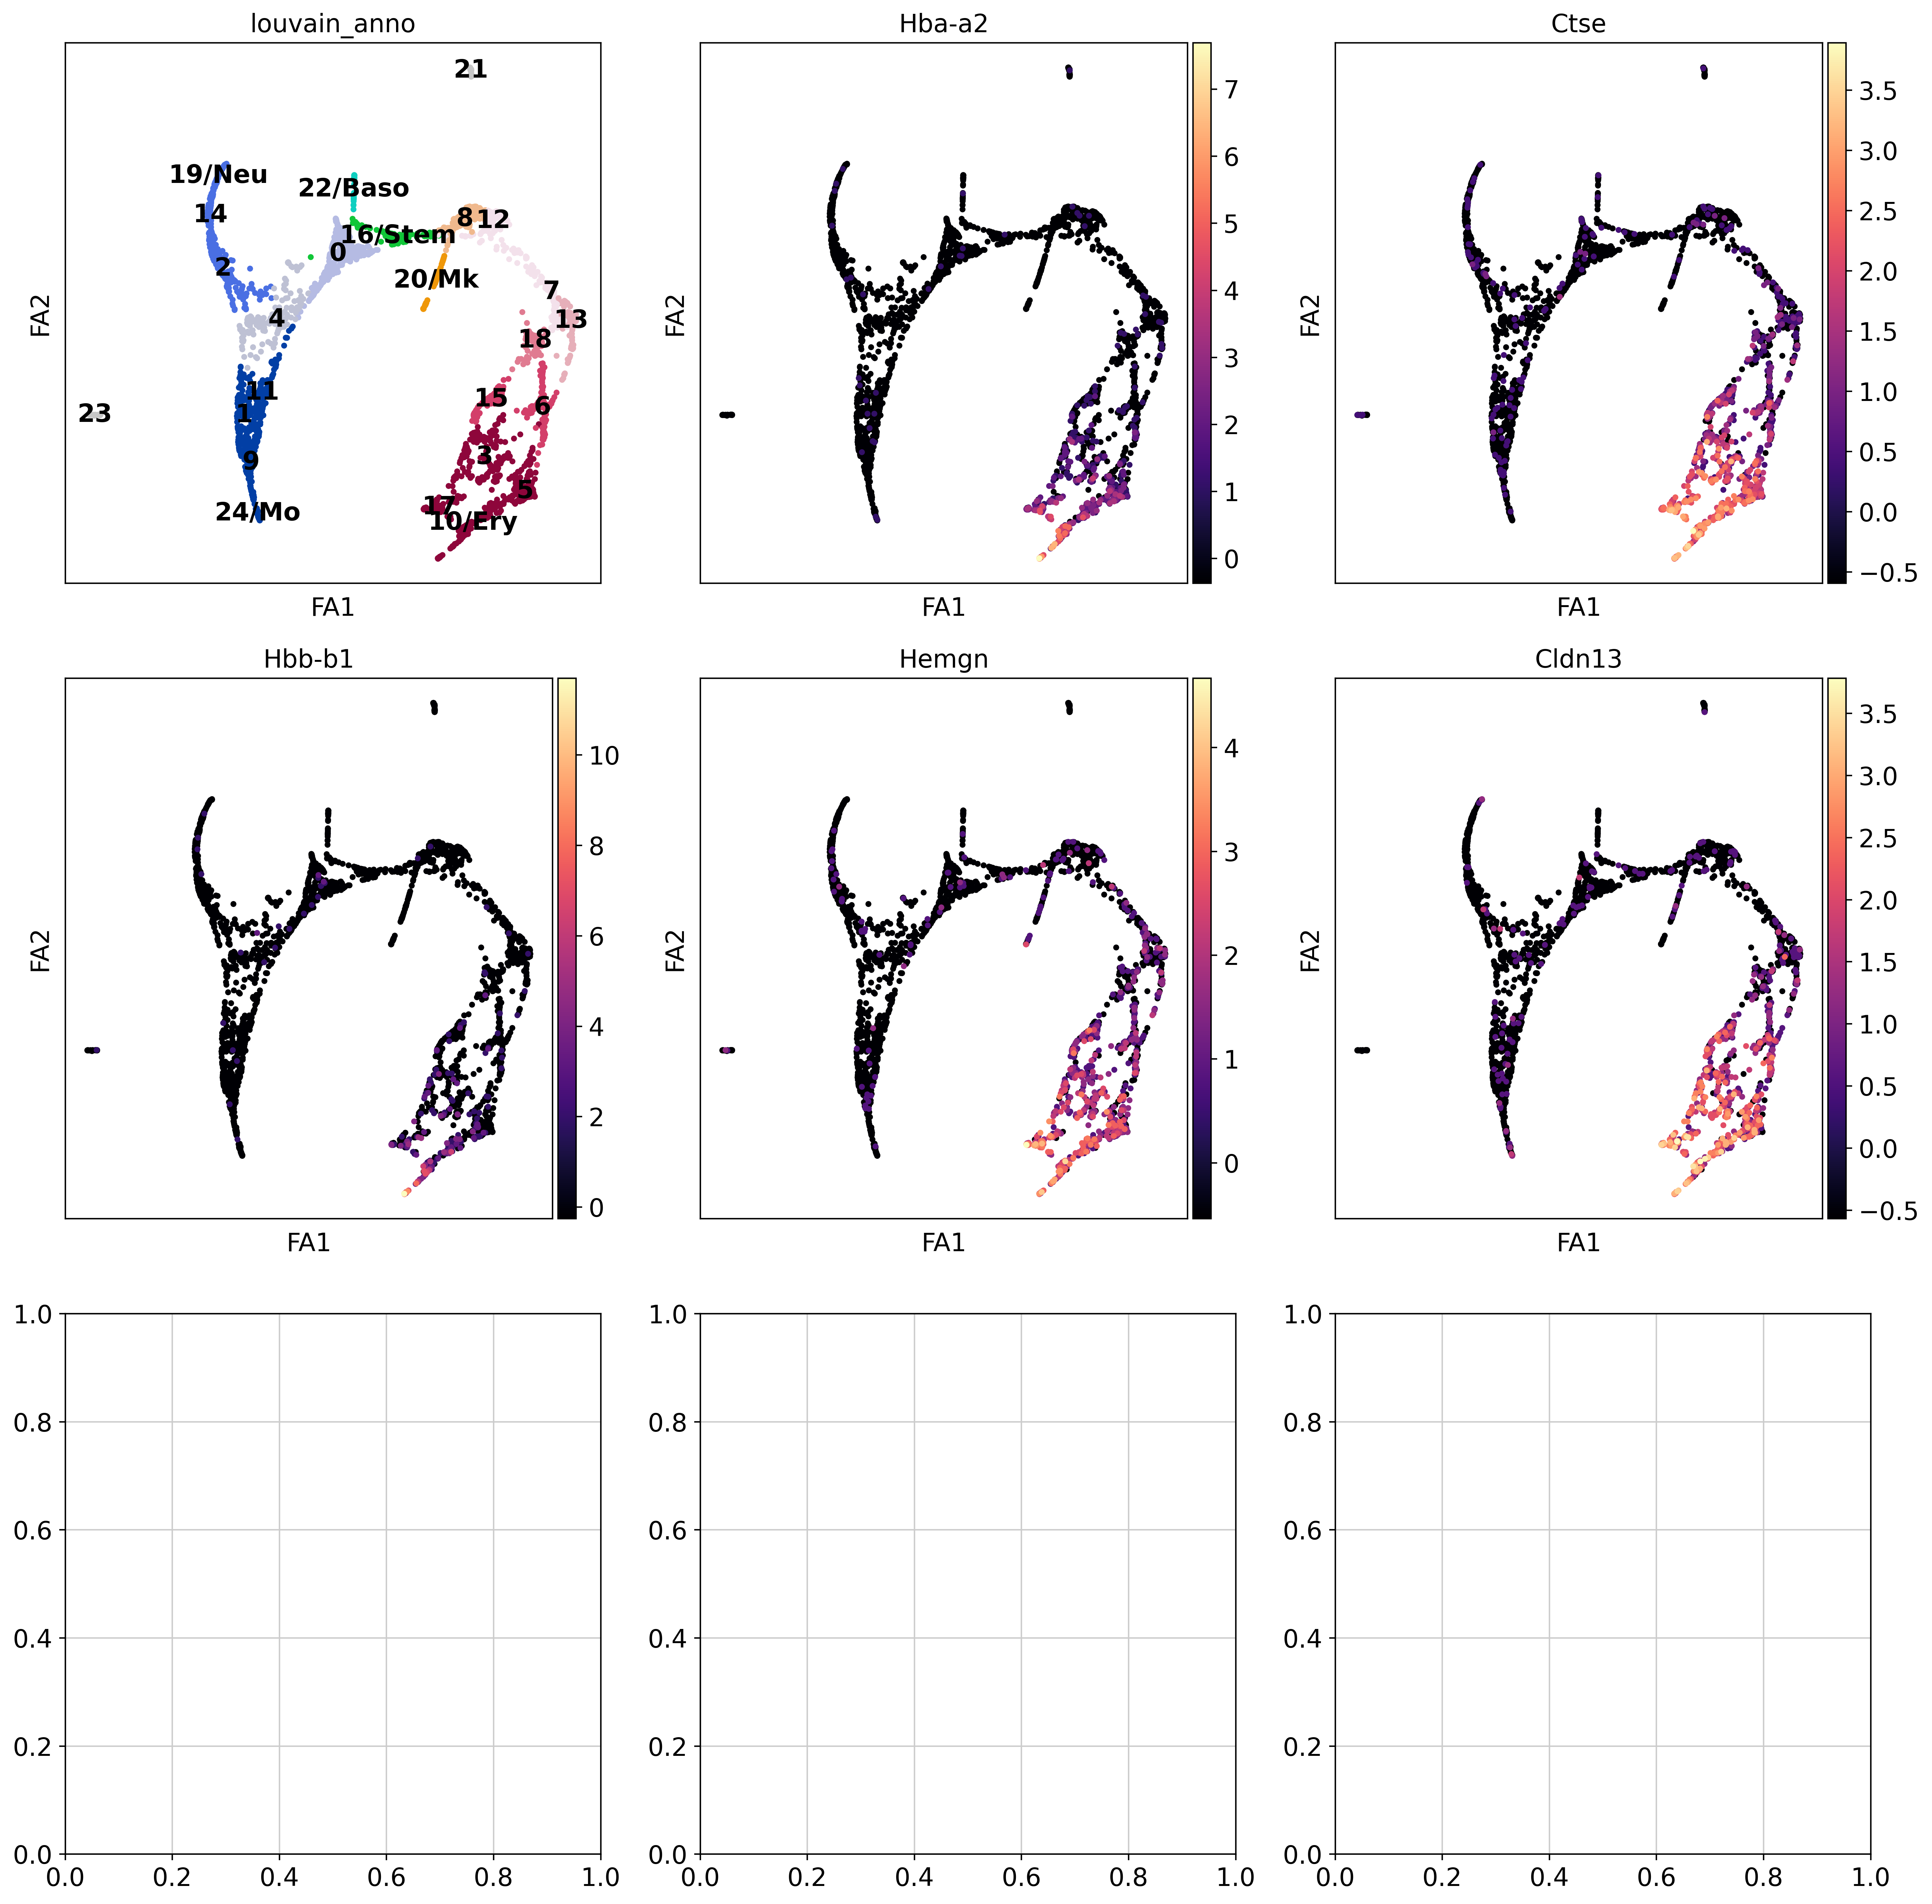

In [56]:
import matplotlib.pyplot as plt

# Create a figure with a specific size
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of features to plot
features = ["louvain_anno", "Hba-a2", "Ctse", "Hbb-b1", "Hemgn","Cldn13"]

# Loop through the features and create a plot for each
for i, feature in enumerate(features):
    sc.pl.draw_graph(
        adata,
        color=feature,
        legend_loc="on data",
        ax=axes[i],  # Use the specific axis for each plot
        show=False,  # Don't show until all plots are created
        color_map="magma",
        frameon=True
    )

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the final arranged plots
plt.show()
